# 0. Descripción del dataset

In [2]:
import pandas as pd
import numpy as np

Cargamos el dataset

In [4]:
df = pd.read_csv("2024_Accidentalidad.csv", sep =";")
df

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2023S040280,04/01/2024,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Motocicleta > 125cc,Conductor,De 55 a 59 años,Hombre,2.0,Ingreso inferior o igual a 24 horas,444913.0,4481427.0,N,NaN
1,2023S040280,04/01/2024,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 55 a 59 años,Mujer,14.0,Sin asistencia sanitaria,444913.0,4481427.0,N,NaN
2,2023S040309,15/02/2024,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Bicicleta,Conductor,De 25 a 29 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,440123.0,4475170.0,N,NaN
3,2023S040309,15/02/2024,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Motocicleta hasta 125cc,Conductor,De 35 a 39 años,Hombre,14.0,Sin asistencia sanitaria,440123.0,4475170.0,N,NaN
4,2023S040310,18/02/2024,10:40:00,GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO,3,7,CHAMBERÍ,Colisión lateral,Despejado,Turismo,Conductor,De 25 a 29 años,Hombre,NaN,NaN,440137.0,4475721.0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40160,2024S030621,18/10/2024,17:05:00,PLAZA. LIMA / AVDA. CONCHA ESPINA,0,5,CHAMARTÍN,Colisión lateral,Se desconoce,Turismo,Conductor,De 45 a 49 años,Hombre,14.0,Sin asistencia sanitaria,441447.0,4478230.0,N,NaN
40161,2024S031786,11/10/2024,2:00:00,CALL. PRINCESA / CALL. ALBERTO AGUILERA,67,9,MONCLOA-ARAVACA,Alcance,Se desconoce,Turismo,Conductor,Desconocido,Desconocido,NaN,NaN,439269.0,4475805.0,N,NaN
40162,2024S031786,11/10/2024,2:00:00,CALL. PRINCESA / CALL. ALBERTO AGUILERA,67,9,MONCLOA-ARAVACA,Alcance,Se desconoce,Turismo,Conductor,Desconocido,Hombre,NaN,NaN,439269.0,4475805.0,N,NaN
40163,2024S031786,11/10/2024,2:00:00,CALL. PRINCESA / CALL. ALBERTO AGUILERA,67,9,MONCLOA-ARAVACA,Alcance,Se desconoce,Turismo,Pasajero,De 21 a 24 años,Hombre,14.0,Sin asistencia sanitaria,439269.0,4475805.0,N,NaN


## Tarea 1: Realiza un análisis descriptivo del dataset. Analiza la distribución de los datos por cada una de las columnas, realiza los pasos de pre-procesamiento necesarios, justificando adecuadamente las acciones tomadas. Se deberá hacer uso de gráficas para entender los datos y las decisiones adoptadas.

### Descripción del dataset

In [7]:
df.columns

Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga'],
      dtype='object')

Podemos ver que, por las columnas del dataset tenemos datos relevantes sobre los accidentes como por ejemplo la fecha y hora en la que ocurrió, localización, distrito, estado meteorológico y también sobre el conductor o pasajeros como rango de edad, sexo, si era positivo en drogas o alcohol, etc.

In [9]:
df.shape

(40165, 19)

Tenemos unos 40000 datos de accidentes con 19 características por accidente

In [11]:
# Resumen de las columnas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40165 entries, 0 to 40164
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        40165 non-null  object 
 1   fecha                 40165 non-null  object 
 2   hora                  40165 non-null  object 
 3   localizacion          40165 non-null  object 
 4   numero                40165 non-null  object 
 5   cod_distrito          40165 non-null  int64  
 6   distrito              40165 non-null  object 
 7   tipo_accidente        40162 non-null  object 
 8   estado_meteorológico  35507 non-null  object 
 9   tipo_vehiculo         39844 non-null  object 
 10  tipo_persona          40165 non-null  object 
 11  rango_edad            40165 non-null  object 
 12  sexo                  40165 non-null  object 
 13  cod_lesividad         22336 non-null  float64
 14  lesividad             22336 non-null  object 
 15  coordenada_x_utm   

Muchas columnas son de tipo objeto, aunque también tenemos numéricas, luego tendremos que convertir estas columnas según su naturaleza. Además, tenemos valores nulos, que trataremos más adelante.

In [13]:
# Descripción estadística general para datos numéricos
print(df.describe())

       cod_distrito  cod_lesividad  coordenada_x_utm  coordenada_y_utm  \
count  40165.000000   22336.000000      40155.000000      4.015500e+04   
mean       9.792108      10.304038     442057.893612      4.474652e+06   
std        5.640908       4.666780       3491.643374      3.985226e+03   
min        1.000000       1.000000     429177.000000      4.463890e+06   
25%        5.000000       7.000000     439872.500000      4.471562e+06   
50%       10.000000      14.000000     441722.000000      4.474663e+06   
75%       14.000000      14.000000     443992.000000      4.477471e+06   
max       21.000000      14.000000     454754.000000      4.491676e+06   

       positiva_droga  
count           170.0  
mean              1.0  
std               0.0  
min               1.0  
25%               1.0  
50%               1.0  
75%               1.0  
max               1.0  


Aquí podemos ver algunas métricas relevantes de las características numéricas

In [15]:
# Resumen de datos cualitativos
print(df.describe(include=['object']))

       num_expediente       fecha      hora         localizacion numero  \
count           40165       40165     40165                40165  40165   
unique          16935         305      1213                12866   1559   
top       2024S026225  08/03/2024  14:00:00  AUTOV. A-2, +00500E      1   
freq               22         254       374                   95   3566   

                  distrito           tipo_accidente estado_meteorológico  \
count                40165                    40162                35507   
unique                  21                       12                    7   
top     PUENTE DE VALLECAS  Colisión fronto-lateral            Despejado   
freq                  3253                    10830                29846   

       tipo_vehiculo tipo_persona   rango_edad    sexo  \
count          39844        40165        40165   40165   
unique            32            3           18       3   
top          Turismo    Conductor  Desconocido  Hombre   
freq       

Vemos que tenemos varias columnas tipo object que tienen muy pocos valores únicos, por lo que habrá que categorizarlas

### Tratamiento de las columnas

De la columna num_expediente, vamos a quedarnos sólo con los números detrás de la S, ya que el año ya lo tenemos en la columna fecha

In [19]:
df['num_expediente'] = df['num_expediente'].str.extract(r'S(\d+)', expand=False).astype(int)

In [20]:
df["cod_distrito"].nunique() == df["distrito"].nunique()

True

In [21]:
df["cod_lesividad"].nunique() == df["lesividad"].nunique()

True

Como tenemos el mismo número de código de distrito que de distritos (como es normal), vamos a eliminar la columna de código de distrito, y más adelante haremos un one-hot encoding de distrito, ya que no sirve de nada mantener las 2 columnas, y mejor eliminamos cod_distrito puesto que no tiene sentido tener una variable categórica con valores numéricos (las clases 1 y 2 no tienen más relación que la 1 y la 4). Lo mismo sucede con el código de lesividad y la lesividad. Eliminamos la de código de lesividad.

Las columnas localización y número tienen muchos valores diferentes (más de 12000 y 1500 respectivamente) por lo que no sería conveniente hacerles un one-hot encoding. Como ya tenemos el distrito y las coordenadas, vamos a prescindir de localización y número.

In [24]:
df.drop(["cod_distrito", "cod_lesividad", "localizacion", "numero"], axis = "columns", inplace = True)

### Tratamiento valores faltantes

<Axes: >

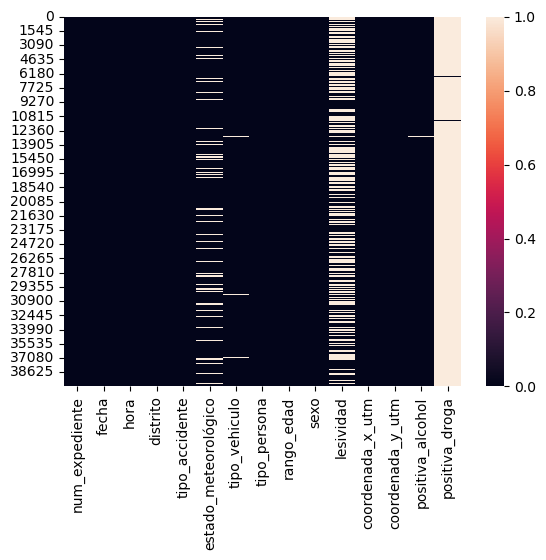

In [29]:
import seaborn as sns
sns.heatmap(df.isnull())    

Columnas con valores faltantes:

In [36]:
cols_con_nan = df.isna().sum()
cols_con_nan[cols_con_nan > 0]

tipo_accidente              3
estado_meteorológico     4658
tipo_vehiculo             321
lesividad               17829
coordenada_x_utm           10
coordenada_y_utm           10
positiva_alcohol          138
positiva_droga          39995
dtype: int64

Vamos a ir tratando una a una las columnas con valores faltantes

La primera que vemos es tipo_accidente

In [39]:
df["tipo_accidente"].unique()

array(['Colisión fronto-lateral', 'Colisión lateral', 'Alcance',
       'Choque contra obstáculo fijo', 'Colisión múltiple',
       'Colisión frontal', 'Atropello a persona', 'Caída',
       'Solo salida de la vía', 'Otro', 'Vuelco', 'Atropello a animal',
       nan], dtype=object)

Vamos a convertir los nan en "Otro"

In [41]:
df['tipo_accidente'] = df['tipo_accidente'].fillna('Otro')

Luego vemos estado_meteorológico

In [43]:
df["estado_meteorológico"].unique()

array(['Lluvia débil', 'Despejado', nan, 'Nublado', 'Se desconoce',
       'LLuvia intensa', 'Granizando', 'Nevando'], dtype=object)

Vamos a convertir los nan en "Se desconoce"

In [45]:
df['estado_meteorológico'] = df['estado_meteorológico'].fillna('Se desconoce')

Después tenemos tipo_vehiculo

In [47]:
df["tipo_vehiculo"].unique()

array(['Motocicleta > 125cc', 'Turismo', 'Bicicleta',
       'Motocicleta hasta 125cc', 'Camión rígido', 'Maquinaria de obras',
       'Furgoneta', 'VMU eléctrico', 'Autobús',
       'Bicicleta EPAC (pedaleo asistido)', nan, 'Todo terreno',
       'Otros vehículos sin motor', 'Autobús articulado', 'Ciclomotor',
       'Sin especificar', 'Otros vehículos con motor',
       'Vehículo articulado', 'Autocaravana', 'Tractocamión', 'Ciclo',
       'Autobus EMT', 'Semiremolque', 'Moto de tres ruedas > 125cc',
       'Cuadriciclo ligero', 'Cuadriciclo no ligero',
       'Moto de tres ruedas hasta 125cc', 'Patinete no eléctrico',
       'Remolque', 'Ambulancia SAMUR', 'Ciclo de motor L1e-A',
       'Ciclomotor de dos ruedas L1e-B', 'Ciclomotor de tres ruedas'],
      dtype=object)

Vamos a convertir los nan en "Sin especificar"

In [52]:
df['tipo_vehiculo'] = df['tipo_vehiculo'].fillna('Sin especificar')

Veamos la columna cod_lesividad

In [54]:
pd.Series(df["lesividad"]).value_counts()

lesividad
Sin asistencia sanitaria                                     13109
Asistencia sanitaria sólo en el lugar del accidente           4720
Ingreso inferior o igual a 24 horas                           1494
Atención en urgencias sin posterior ingreso                   1111
Asistencia sanitaria inmediata en centro de salud o mutua      950
Ingreso superior a 24 horas                                    475
Asistencia sanitaria ambulatoria con posterioridad             453
Fallecido 24 horas                                              24
Name: count, dtype: int64

Vamos a poner los nan a "Desconocido"

In [56]:
df['lesividad'] = df['lesividad'].fillna('Desconocido')

Tratamiento de coordenada_x_utm y coordenada_y_utm:

In [58]:
nulos_coord_x = df['coordenada_x_utm'].isna()
idx_nulos_coord_x = nulos_coord_x[nulos_coord_x>0].index

nulos_coord_y = df['coordenada_y_utm'].isna()
idx_nulos_coord_y = nulos_coord_y[nulos_coord_y>0].index
all(idx_nulos_coord_y == idx_nulos_coord_x)

True

Los valores faltantes de coordenada_x_utm son en los mismos accidentes que los de coordenada_y_utm. Como son coordenadas y son todas muy próximas por haber ocurrido en Madrid todos los accidentes, vamos a rellenar con la media de cada columna

In [60]:
for col in ["coordenada_x_utm", "coordenada_y_utm"]:
    df[col] = df[col].fillna(df[col].mean())

Tratamos positiva_alcohol:

In [62]:
df["positiva_alcohol"].unique()

array(['N', 'S', nan], dtype=object)

Convertimos los nan en "Desconocido" puesto que como tenemos "S" de Si y "N" de No, suponemos que los nan son porque no se ha hecho el control de alcoholemia

In [64]:
df['positiva_alcohol'] = df['positiva_alcohol'].fillna('Desconocido')

Por último, positiva_droga

In [66]:
df["positiva_droga"].unique()

array([nan,  1.])

Vamos a convertir los nan en 0, ya que como el único otro valor es 1 (positivo), suponemos que el resto serán negativos

In [68]:
df['positiva_droga'] = df['positiva_droga'].fillna(0)

In [69]:
df.isna().sum().sum()

0

Ya no quedan valores faltantes

## Cambio de tipos

In [72]:
df.dtypes

num_expediente            int32
fecha                    object
hora                     object
distrito                 object
tipo_accidente           object
estado_meteorológico     object
tipo_vehiculo            object
tipo_persona             object
rango_edad               object
sexo                     object
lesividad                object
coordenada_x_utm        float64
coordenada_y_utm        float64
positiva_alcohol         object
positiva_droga          float64
dtype: object

Convertimos la columna fecha a datetime y sacamos dos columnas de hora: hora y minuto (int)

In [74]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')
df['hour'] = pd.to_datetime(df['hora'], format='%H:%M:%S').dt.hour
df['minuto'] = pd.to_datetime(df['hora'], format='%H:%M:%S').dt.minute

# Nos quitamos la columna hora que ya no hace falta
df.drop(["hora"], inplace = True, axis = "columns")

Guardamos el dataframe en df_raw por que más adelante lo necesitaremos sin hacer one-hot encoding.

In [76]:
df_raw = df.copy()

In [77]:
import pickle
df_raw.to_pickle("Accidentes_raw.pkl")

### Visualización de los datos

C:\Users\Propietario\AppData\Local\Temp\ipykernel_17544\816640296.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_raw, y='distrito', order=df['distrito'].value_counts().index, palette = "tab10")


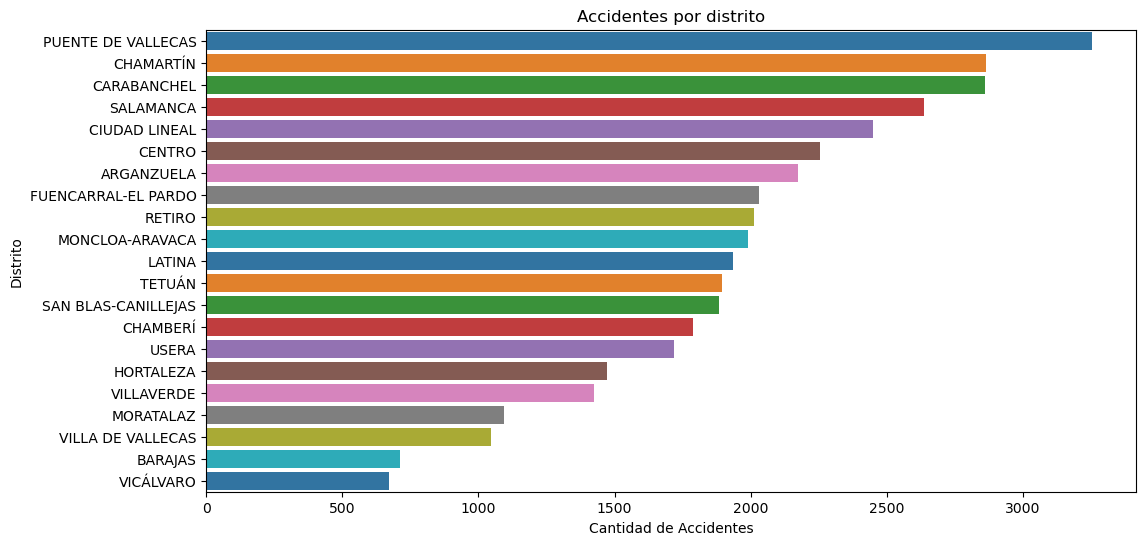

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df_raw, y='distrito', order=df['distrito'].value_counts().index, palette = "tab10")
plt.title('Accidentes por distrito')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Distrito')
plt.show()

Visualizamos en qué distritos se han producido más accidentes

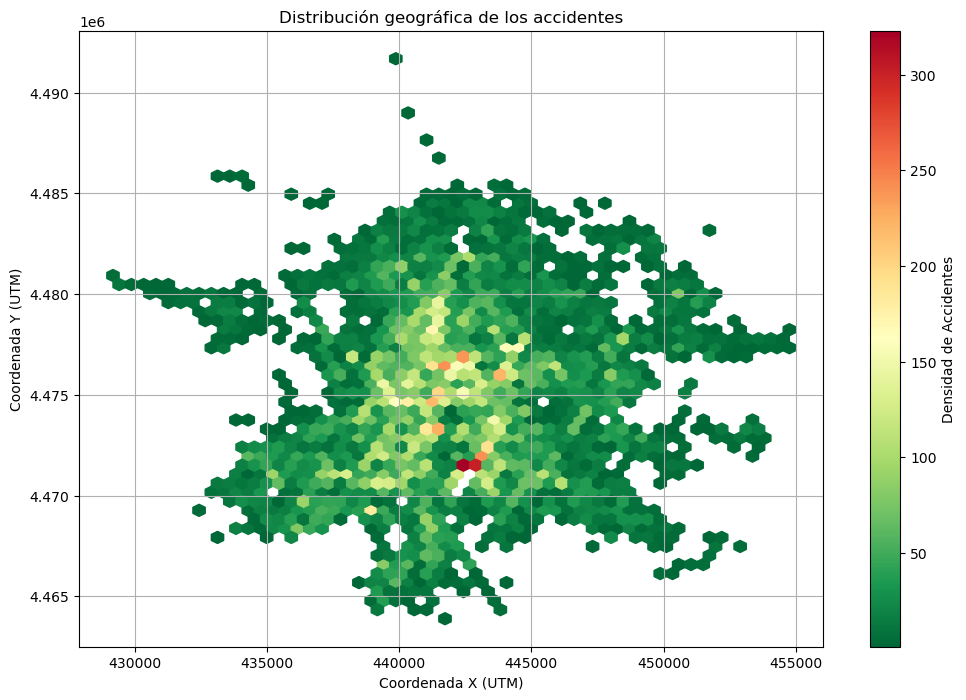

In [81]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

# Histograma bidimensional
hb = plt.hexbin(
    df_raw['coordenada_x_utm'], 
    df_raw['coordenada_y_utm'], 
    gridsize=55,  # Tamaño de la cuadrícula
    cmap='RdYlGn_r',  # Mapa de colores (rojo -> amarillo -> verde invertido)
    mincnt=1       
)

# Barra de color para interpretar la densidad
cb = plt.colorbar(hb)
cb.set_label('Densidad de Accidentes')

plt.title('Distribución geográfica de los accidentes')
plt.xlabel('Coordenada X (UTM)')
plt.ylabel('Coordenada Y (UTM)')
plt.grid(True)
plt.show()


La distribución por coordenadas con mapa de calor según densidad de accidentes, vemos que claramente hay más por el centro, y que se extienden al extrarradio por las autopistas (A1-A6), con zonas sin accidentes como la casa de campo o barajas

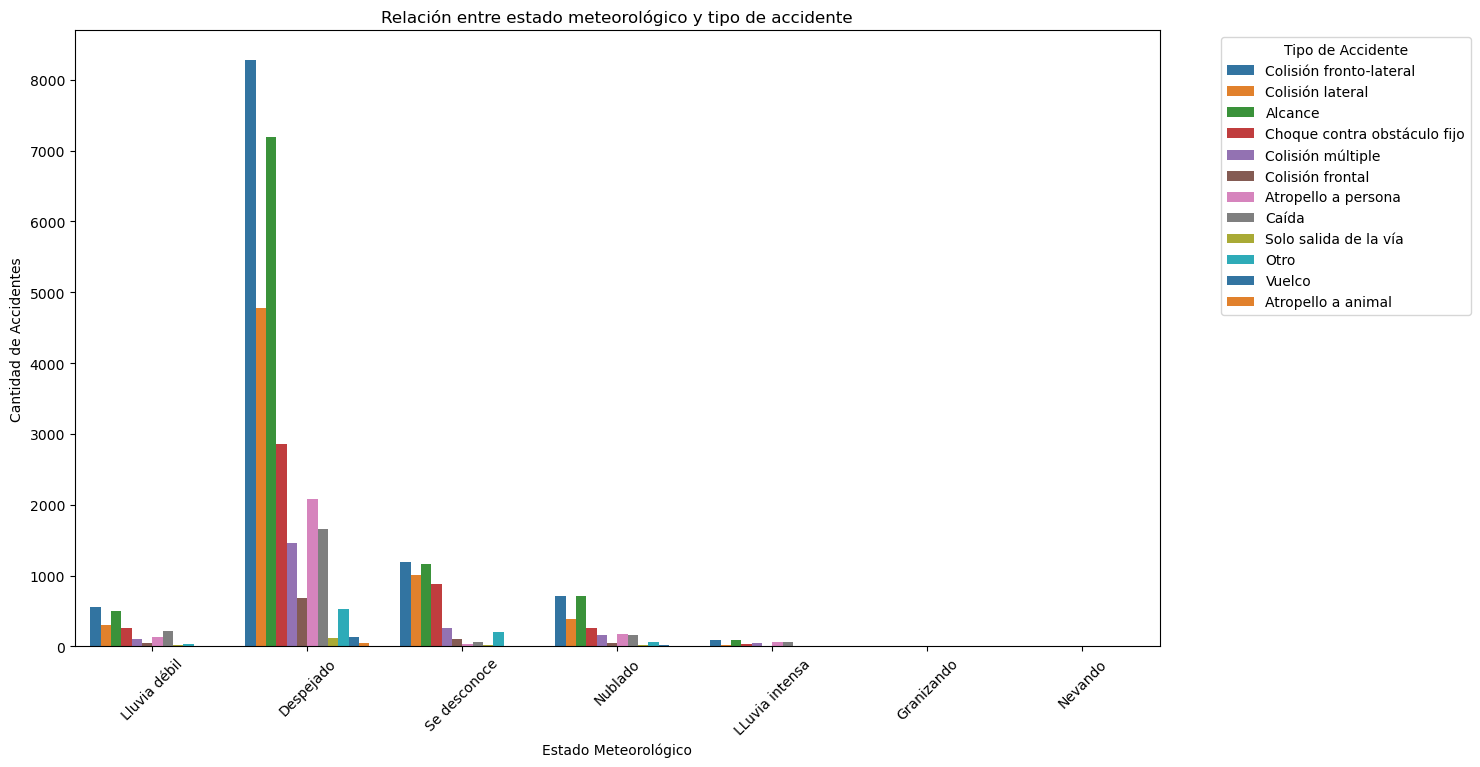

In [83]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_raw, x='estado_meteorológico', hue='tipo_accidente', dodge=True, palette = "tab10")
plt.title('Relación entre estado meteorológico y tipo de accidente')
plt.xlabel('Estado Meteorológico')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Accidente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


La mayor parte de los accidentes ocurren con cielo despejado por el clima que tiene Madrid, bastante soleado, pero podemos ver que cuando llueve o hay niebla también tenemos accidentes, elevándose los que son por alcance, debido a la humedad de la calzada que la hace más deslizante.   
Los accidentes más comunes son por colisión fronto-lateral, lateral y por alcance.

Nos quedamos sólo con los accidentes de los vehículos más comunes para una mejor visualización:

In [86]:
vehiculos_comunes = df_raw["tipo_vehiculo"].value_counts()
vehiculos_comunes = vehiculos_comunes[vehiculos_comunes > 500].index.to_list()

indices_vehiculos_comunes = df_raw[df_raw['tipo_vehiculo'].isin(vehiculos_comunes)].index

df_aux = df_raw.iloc[indices_vehiculos_comunes]

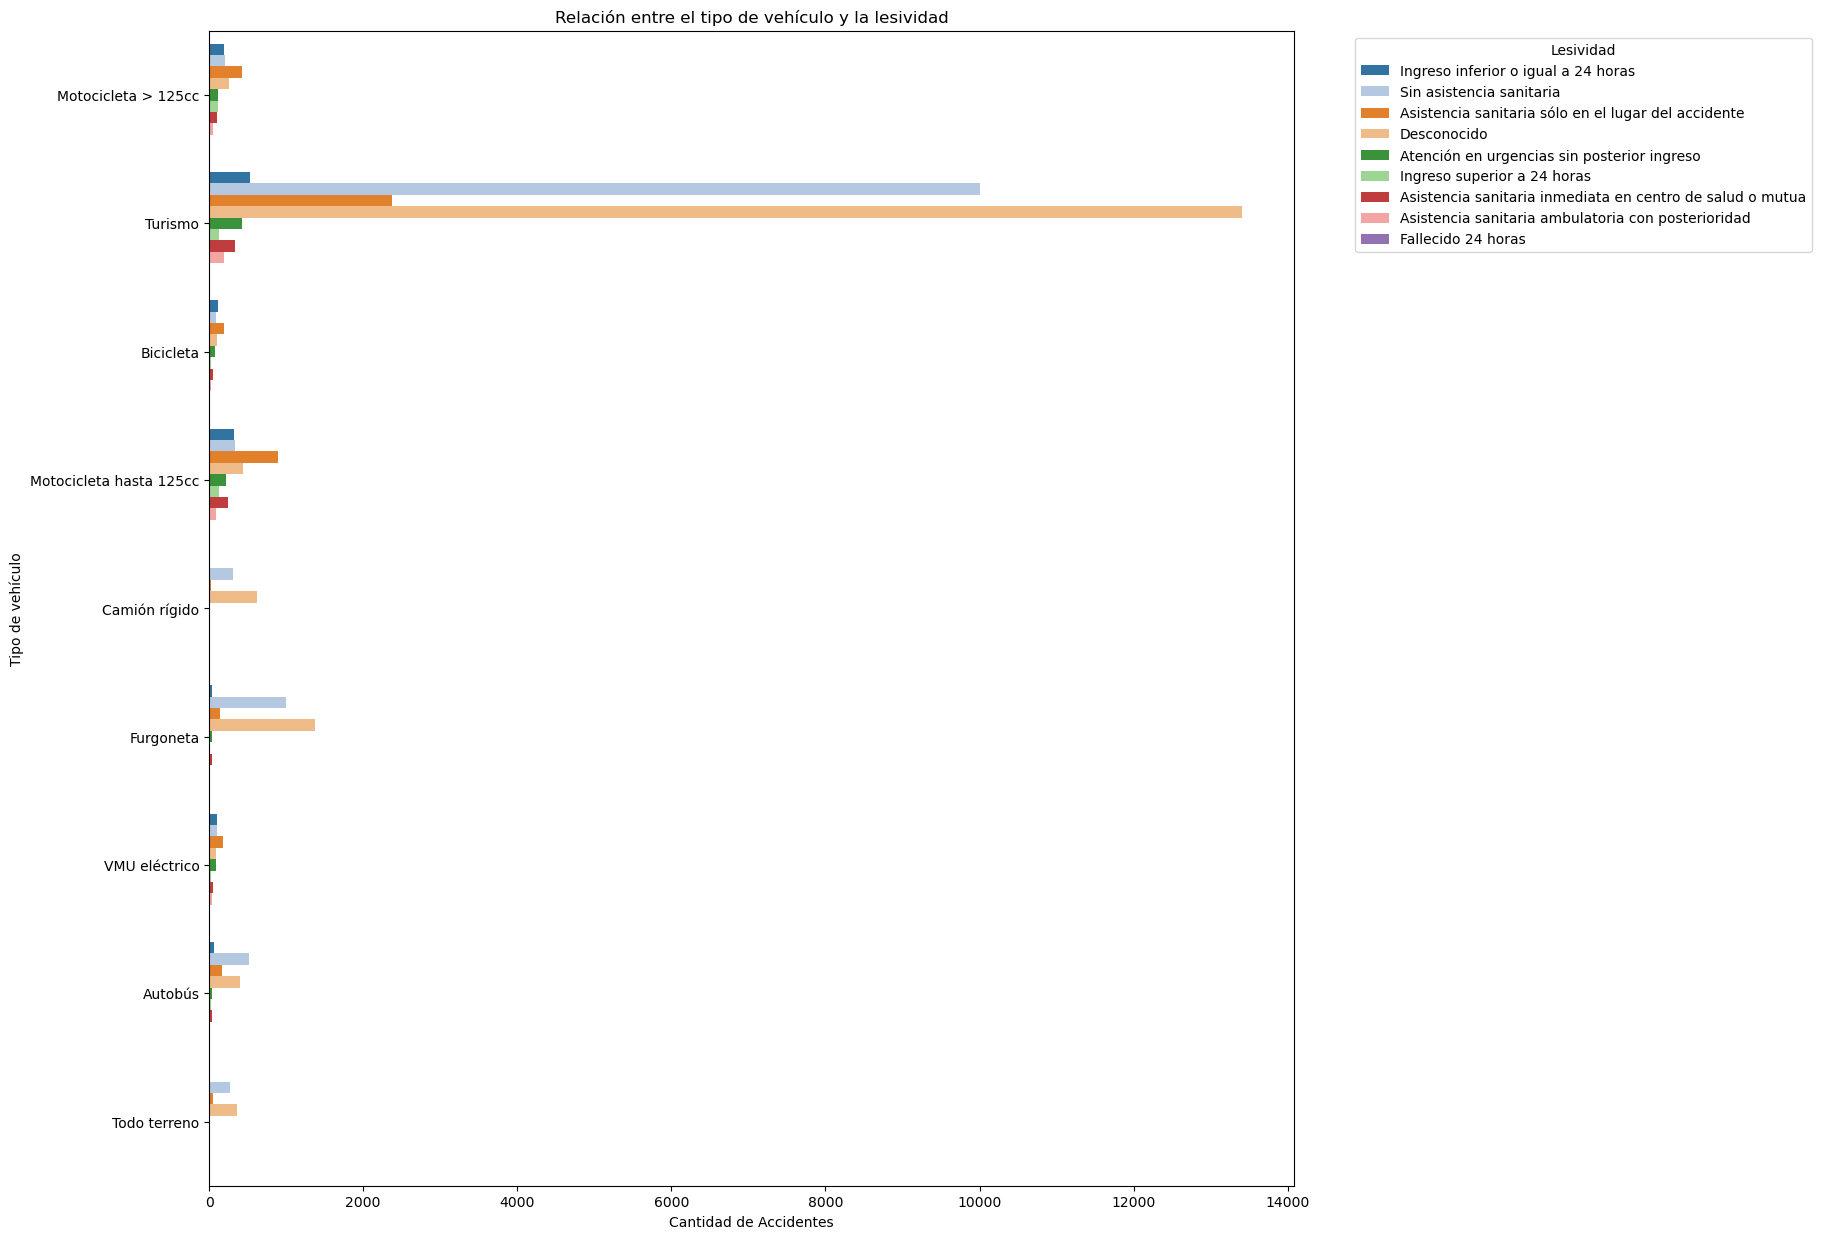

In [87]:
plt.figure(figsize=(14, 15))
sns.countplot(data=df_aux, y='tipo_vehiculo', hue='lesividad', palette='tab20', dodge=True)
plt.title('Relación entre el tipo de vehículo y la lesividad')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Tipo de vehículo')
plt.legend(title='Lesividad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Podemos ver que los turismos son los que más involucrados están en accidentes, porque son los más comunes en las carreteras. Además, las motocicletas suelen necesitar asistencia sanitaria debido a que son más inseguras que un coche o furgoneta por la exposición que suponen.

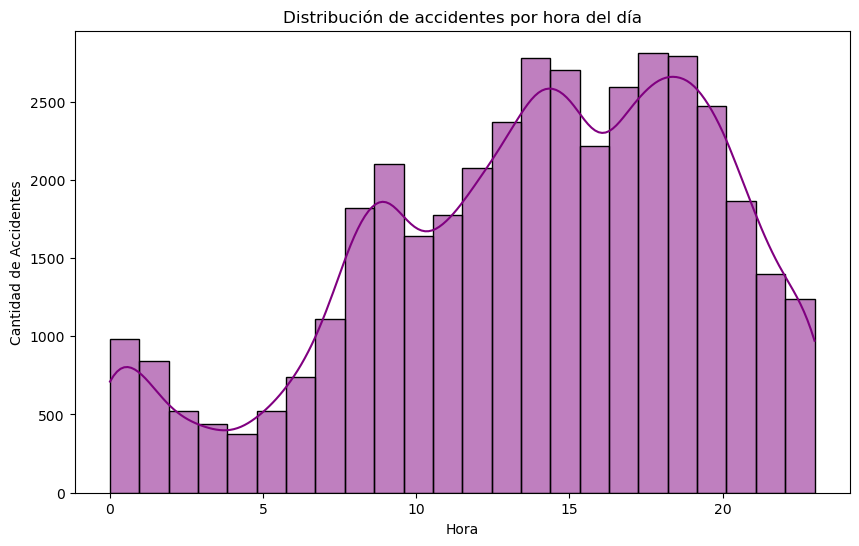

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(df_raw['hour'], bins=24, kde=True, color='purple')
plt.title('Distribución de accidentes por hora del día')
plt.xlabel('Hora')
plt.ylabel('Cantidad de Accidentes')
plt.show()

Podemos ver que, como era de esperear, a altas horas de la madrugada hay menos accidentes. Hay un pico cuando la gente está yendo a trabajar (8-9 AM), a la hora de comer (2-3 PM) y por la tarde pronto (6-7 PM), pues es cuando la gente utiliza más el coche.

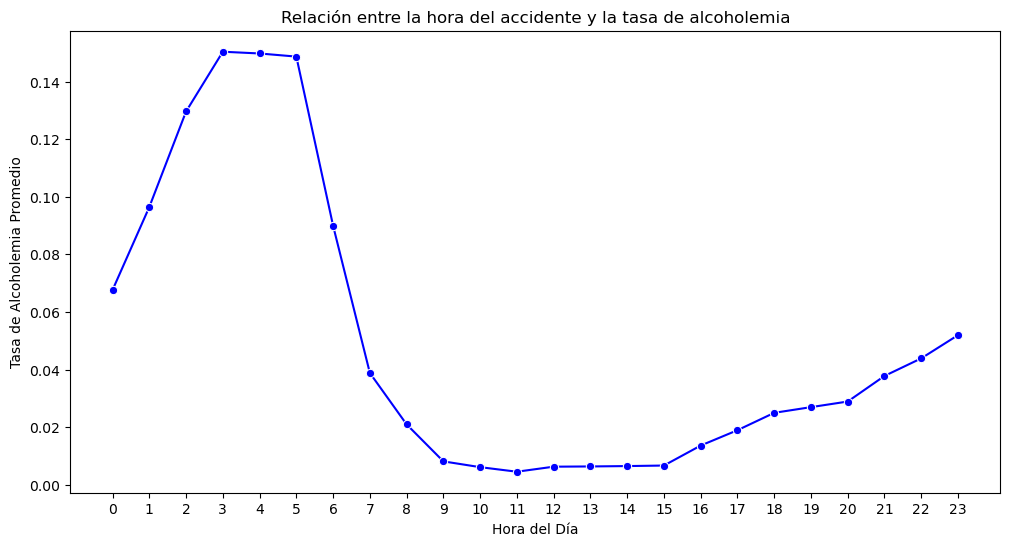

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertimos 'positiva_alcohol' a valores numéricos (1 = S, 0 = N)
df_raw['positiva_alcohol_numeric'] = df_raw['positiva_alcohol'].map({'S': 1, 'N': 0})

# Agrupamos por hora y calculamos la tasa promedio de alcoholemia
hourly_alcohol_rate = df_raw.groupby('hour')['positiva_alcohol_numeric'].mean()

# Relación entre la hora y la tasa de alcoholemia
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_alcohol_rate.index, y=hourly_alcohol_rate.values, marker='o', color='b')
plt.title('Relación entre la hora del accidente y la tasa de alcoholemia')
plt.xlabel('Hora del Día')
plt.ylabel('Tasa de Alcoholemia Promedio')
plt.xticks(range(0, 24))
plt.show()
df_raw.drop(['positiva_alcohol_numeric'], inplace = True, axis = "columns")

La tasa de alcoholemia positiva es mayor a las horas de la madrugada, por la tendencia  de beber cuando es de noche y salir de fiesta con un vehículo. Durante el día es muy bajo y comienza a ascender a partir de las 16H.

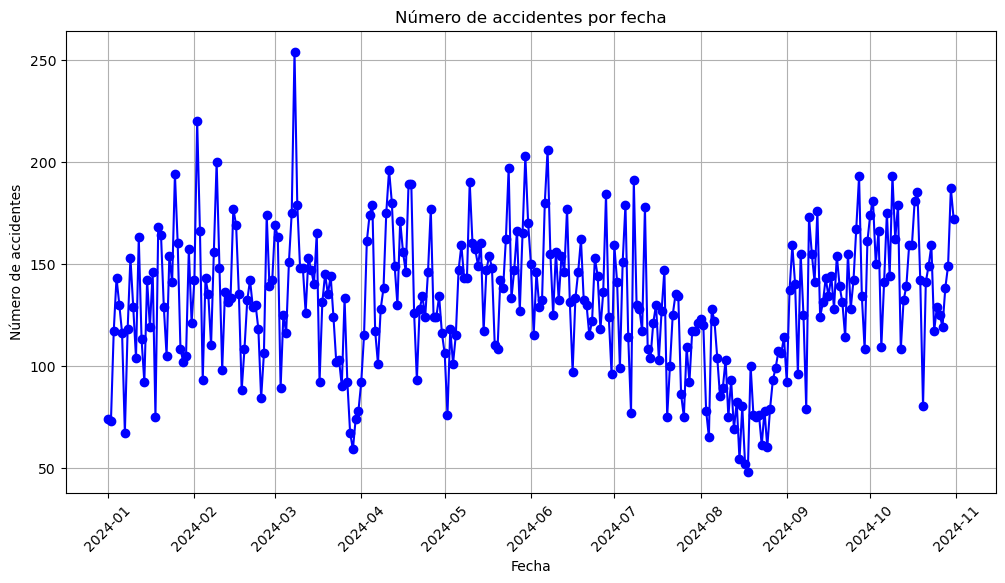

In [93]:
import matplotlib.pyplot as plt

# Número de accidentes por fecha
accidents_per_date = df_raw.groupby('fecha').size()

# Graficamos
plt.figure(figsize=(12, 6))
plt.plot(accidents_per_date.index, accidents_per_date.values, marker='o', color='b')
plt.title('Número de accidentes por fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de accidentes')
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()


Vemos que en Julio y Agosto descienden los accidentes, seguramente porque al ser periodo vacacional de verano, los madrileños se van fuera de veraneo y hay menos vehículos en la ciudad. El resto del año permanecen bastante uniformes.

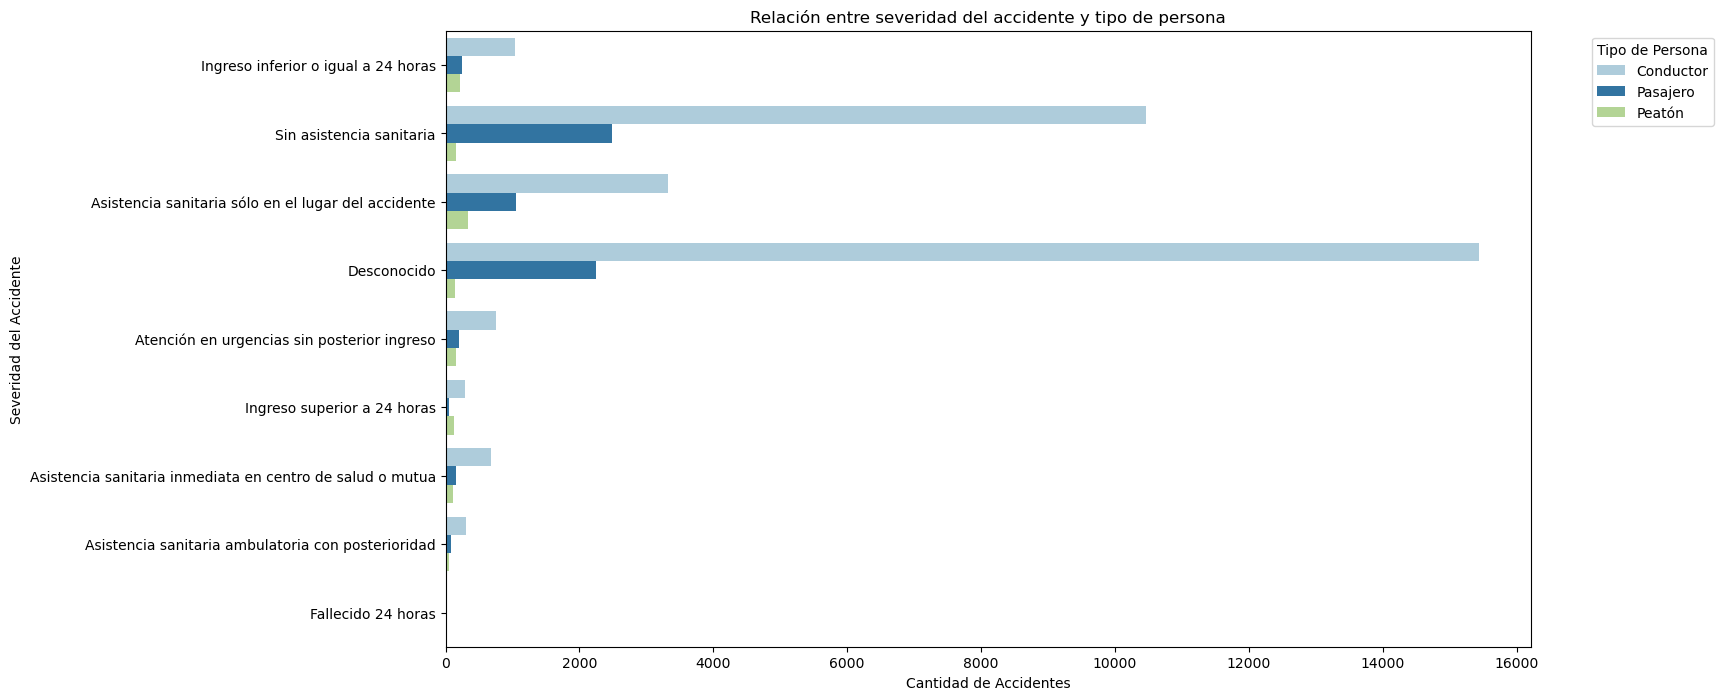

In [95]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_raw, y='lesividad', hue='tipo_persona', palette='Paired', dodge=True)
plt.title('Relación entre severidad del accidente y tipo de persona')
plt.ylabel('Severidad del Accidente')
plt.xlabel('Cantidad de Accidentes')
plt.legend(title='Tipo de Persona', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Vemos que lo usual para los conductores es que no reciban asistencia sanitaria, en cambio los peatones como van más expuestos si que reciben más, los pasajeros al igual que los conductores.

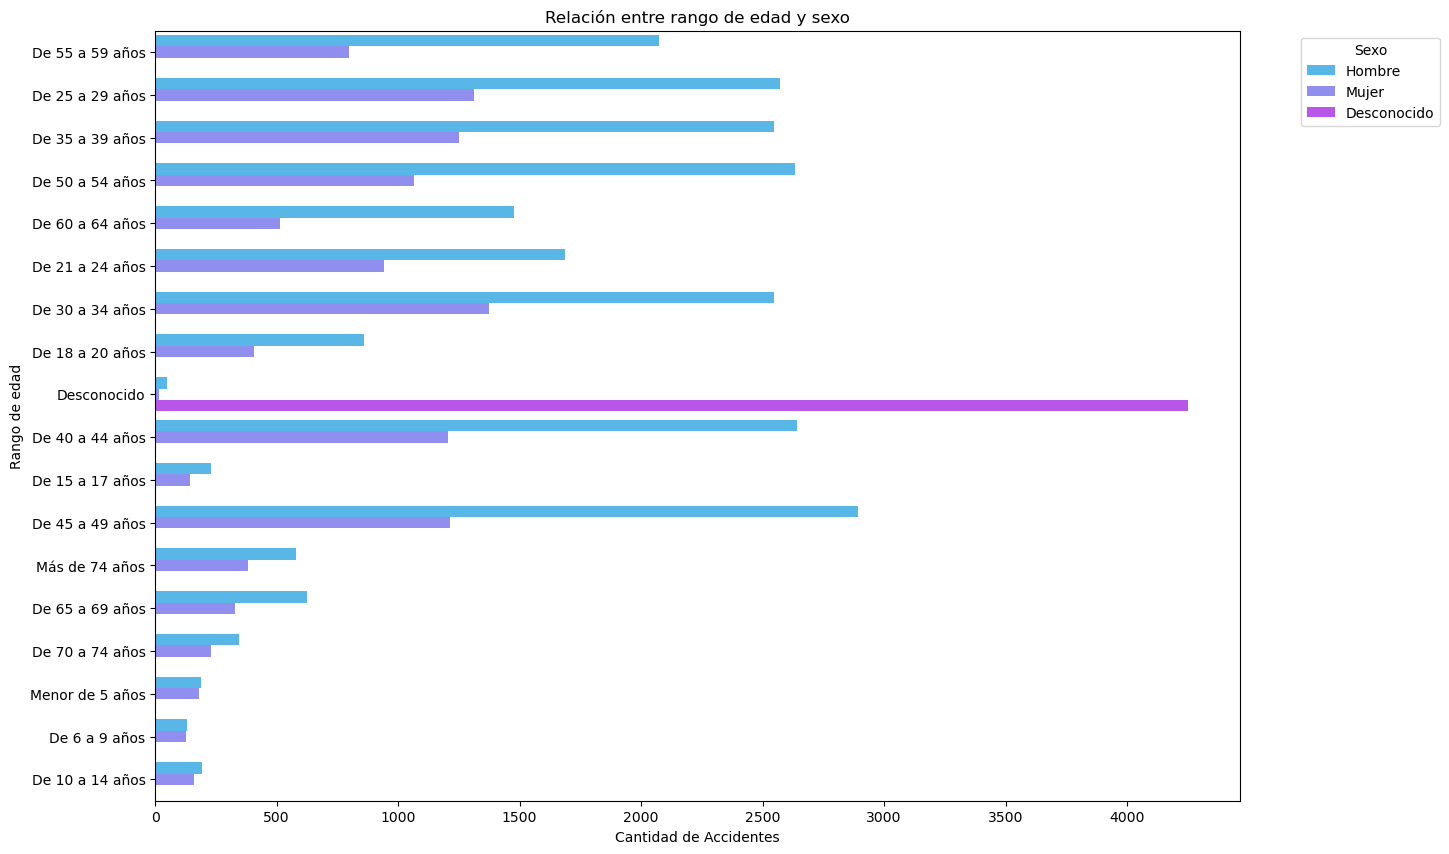

In [97]:
plt.figure(figsize=(14, 10))
sns.countplot(data=df_raw, y='rango_edad', hue='sexo', palette='cool', dodge=True)
plt.title('Relación entre rango de edad y sexo')
plt.ylabel('Rango de edad')
plt.xlabel('Cantidad de Accidentes')
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Vemos que la mayoría de accidentes les sucede a personas entre los 30 y 60 años, ya que son las edades comunes de los conductores, y que los hombres suelen duplicar a las mujeres en los accidentes

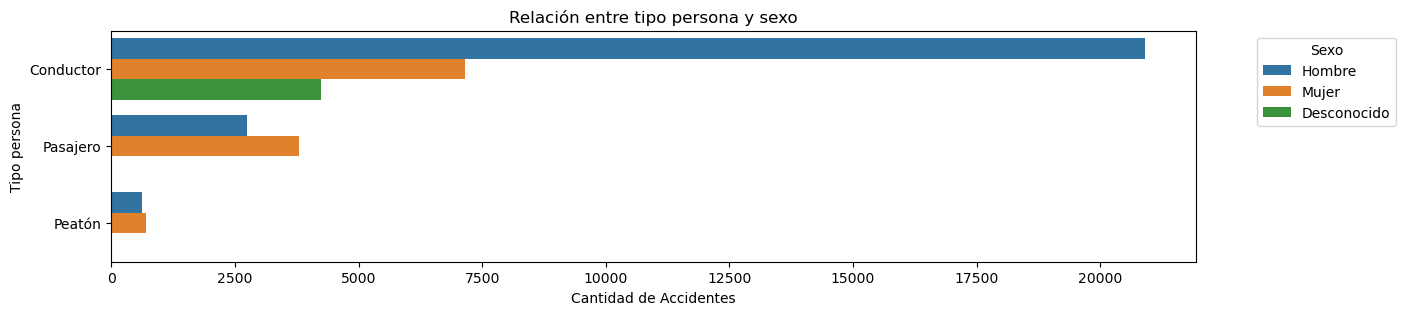

In [109]:
plt.figure(figsize=(14, 3))
sns.countplot(data=df_raw, y='tipo_persona', hue='sexo', palette='tab10', dodge=True)
plt.title('Relación entre tipo persona y sexo')
plt.ylabel('Tipo persona')
plt.xlabel('Cantidad de Accidentes')
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


La mayor parte de los conductores involucrados en accidentes son hombres, las mujeres predominan más como pasajeras o peatones

### One-hot encoding

In [112]:
tipo_object = df.select_dtypes(include = ["object"])
tipo_object.nunique()

distrito                21
tipo_accidente          12
estado_meteorológico     7
tipo_vehiculo           32
tipo_persona             3
rango_edad              18
sexo                     3
lesividad                9
positiva_alcohol         3
dtype: int64

Como no tenemos demasiados valores distintos para las columnas tipo object, vamos a hacer un one-hot encoding de ellas, para poder meterlas a los algoritmos de clustering

In [114]:
dummies = pd.get_dummies(tipo_object)
dummies

,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,distrito_CHAMARTÍN,distrito_CHAMBERÍ,distrito_CIUDAD LINEAL,distrito_FUENCARRAL-EL PARDO,distrito_HORTALEZA,distrito_LATINA,...,lesividad_Asistencia sanitaria sólo en el lugar del accidente,lesividad_Atención en urgencias sin posterior ingreso,lesividad_Desconocido,lesividad_Fallecido 24 horas,lesividad_Ingreso inferior o igual a 24 horas,lesividad_Ingreso superior a 24 horas,lesividad_Sin asistencia sanitaria,positiva_alcohol_Desconocido,positiva_alcohol_N,positiva_alcohol_S
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40160,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
40161,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
40162,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
40163,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


Unimos los dataframes

In [116]:
cols_no_object = [cols for cols in df.columns if cols not in tipo_object.columns]
resto_df = df[cols_no_object]
resto_df
df = pd.concat([resto_df, dummies], axis = "columns")
df

,num_expediente,fecha,coordenada_x_utm,coordenada_y_utm,positiva_droga,hour,minuto,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,...,lesividad_Asistencia sanitaria sólo en el lugar del accidente,lesividad_Atención en urgencias sin posterior ingreso,lesividad_Desconocido,lesividad_Fallecido 24 horas,lesividad_Ingreso inferior o igual a 24 horas,lesividad_Ingreso superior a 24 horas,lesividad_Sin asistencia sanitaria,positiva_alcohol_Desconocido,positiva_alcohol_N,positiva_alcohol_S
0,40280,2024-01-04,444913.0,4481427.0,0.0,14,9,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,40280,2024-01-04,444913.0,4481427.0,0.0,14,9,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,40309,2024-02-15,440123.0,4475170.0,0.0,14,5,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,40309,2024-02-15,440123.0,4475170.0,0.0,14,5,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,40310,2024-02-18,440137.0,4475721.0,0.0,10,40,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40160,30621,2024-10-18,441447.0,4478230.0,0.0,17,5,False,False,False,...,False,False,False,False,False,False,True,False,True,False
40161,31786,2024-10-11,439269.0,4475805.0,0.0,2,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
40162,31786,2024-10-11,439269.0,4475805.0,0.0,2,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
40163,31786,2024-10-11,439269.0,4475805.0,0.0,2,0,False,False,False,...,False,False,False,False,False,False,True,False,True,False


Como podemos ver, han aumentado mucho las columnas por el one-hot encoding

Vamos a eliminar las columnas numéricas cuya varianza sea muy baja (menor que 0.001)

In [131]:
varianzas = df.var(numeric_only=True)
cols_to_drop = varianzas[varianzas < 0.001].index.to_list()

df.drop(cols_to_drop, inplace = True, axis = "columns")
df.shape

(40165, 97)

Para entrenar los modelos de clustering no podemos tener columnas tipo datetime, así que vamos a separarla en 2 columnas numéricas (mes y dia) dado que el año es 2024 para todos los accidentes, y no aporta información.

In [137]:
# Creamos nuevas columnas para el año, mes y día
df['mes'] = df['fecha'].dt.month
df['dia'] = df['fecha'].dt.day

# Eliminamos la columna original 'fecha'
df.drop(columns=['fecha'], inplace = True, axis = "columns")

Vamos a estandarizar las columnas numéricas con valores superiores a 2 para no seleccionar las booleanas.

In [141]:
from sklearn.preprocessing import StandardScaler

numerical_columns = df.select_dtypes(include=["number"])

# Máscara para columnas con algún valor > 2
columns_with_values_gt_2 = numerical_columns.columns[(numerical_columns >= 2).any()]

mayores_que2 = df[columns_with_values_gt_2]

# Aplicamos StandardScaler solo a las columnas seleccionadas
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[columns_with_values_gt_2])

# Sustituimos las columnas originales por las escaladas
df[columns_with_values_gt_2] = scaled_values
df

,num_expediente,coordenada_x_utm,coordenada_y_utm,positiva_droga,hour,minuto,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,...,lesividad_Atención en urgencias sin posterior ingreso,lesividad_Desconocido,lesividad_Ingreso inferior o igual a 24 horas,lesividad_Ingreso superior a 24 horas,lesividad_Sin asistencia sanitaria,positiva_alcohol_Desconocido,positiva_alcohol_N,positiva_alcohol_S,mes,dia
0,2.694988,0.817809,1.700384,0.0,0.031657,-0.995377,False,False,False,False,...,False,False,True,False,False,False,True,False,-1.557331,-1.315997
1,2.694988,0.817809,1.700384,0.0,0.031657,-0.995377,False,False,False,False,...,False,False,False,False,True,False,True,False,-1.557331,-1.315997
2,2.698321,-0.554226,0.130121,0.0,0.031657,-1.225625,False,False,False,True,...,False,False,False,False,False,False,True,False,-1.210935,-0.059889
3,2.698321,-0.554226,0.130121,0.0,0.031657,-1.225625,False,False,False,True,...,False,False,False,False,True,False,True,False,-1.210935,-0.059889
4,2.698436,-0.550216,0.268400,0.0,-0.662771,0.789049,False,False,False,False,...,False,True,False,False,False,False,True,False,-1.210935,0.282686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40160,1.584919,-0.174983,0.898062,0.0,0.552478,-1.225625,False,False,False,False,...,False,False,False,False,True,False,True,False,1.560238,0.282686
40161,1.718808,-0.798843,0.289481,0.0,-2.051628,-1.513436,False,False,False,False,...,False,True,False,False,False,False,True,False,1.560238,-0.516656
40162,1.718808,-0.798843,0.289481,0.0,-2.051628,-1.513436,False,False,False,False,...,False,True,False,False,False,False,True,False,1.560238,-0.516656
40163,1.718808,-0.798843,0.289481,0.0,-2.051628,-1.513436,False,False,False,False,...,False,False,False,False,True,False,True,False,1.560238,-0.516656


Pasamos todos los tipos a float ya que a veces el tipo booleano puede causar errores para el entrenamiento

In [145]:
df = df.astype('float64')

Finalmente nos quedamos con 98 características, bastantes más de las que contábamos al principio pero todas numéricas o datetime. A este dataframe le aplicaremos las distintas técnicas de clustering, por lo que vamos a guardarlo en pickle para que se guarden los tipos de datos.

In [148]:
import pickle
df.to_pickle("Accidentes_limpio.pkl")

# 1. Aplicación de algoritmos de clustering jerárquico

## Tarea 2.1: Aplica al menos 2 algoritmos de clustering jerárquico sobre el dataset proporcionado, probando y evaluando los efectos de la distancia utilizada (euclídea, coseno…). 

## Tarea 2.2: Analiza a determinadas profundidades la distribución de los ejemplos en el dendograma. ¿Es uniforme la distribución independientemente de la profundidad?

Respondo a las 2 preguntas bajo cada gráfica para tener el apoyo visual

Importamos librerías y definimos función para visualizar los dendogramas

In [161]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    """ Create linkage matrix and then plot the dendrogram
    """
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

### Agglomerative Clustering
El primer modelo de clustering jerárquico que vamos a emplear es el Agglomerative Clustering (bottom-up) con distancias euclídeas, coseno y manhattan.  
Utilizamos hiperparámetros n_clusters = None para que nos haga el dendograma completo y distance_threshold = 0 (ya que el anterior hiperparámetro está a cero).

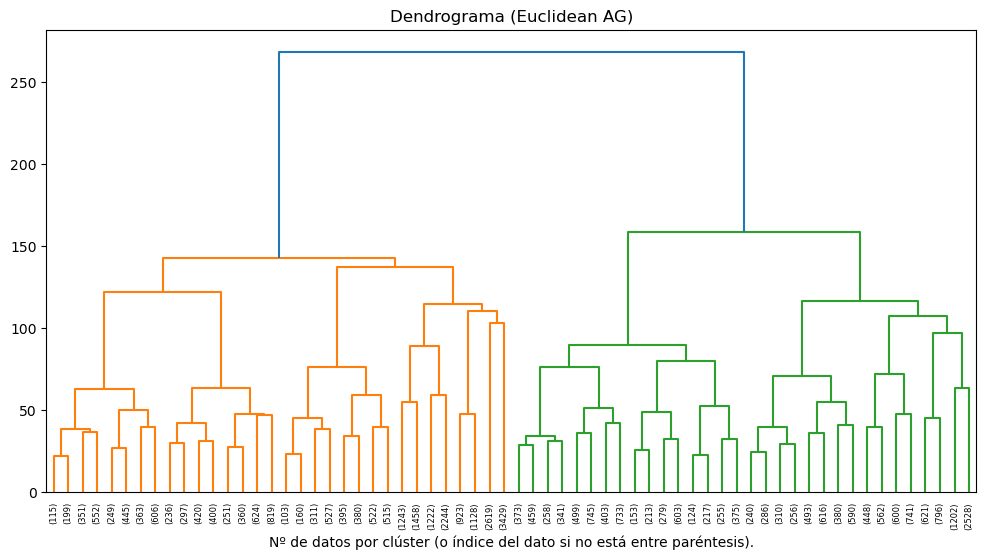

In [164]:
AG_euclidean = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='euclidean', linkage='ward')
AG_euclidean.fit(df)

# Graficamos el dendrograma para la distancia Euclidea
plt.figure(figsize=(12, 6))
plt.title("Dendrograma (Euclidean AG)")
plot_dendrogram(AG_euclidean, truncate_mode="level", p=5)
plt.xlabel("Nº de datos por clúster (o índice del dato si no está entre paréntesis).")
plt.show()


Este es el método que mejor hace el clustering, ya que como podemos ver, la división entre los distintos clústers utilizando la distancia euclidea consigue que los clústers estén balanceados en número de puntos. No tenemos ningun clúster con un único dato.   
Variando la profundidad vemos que el tamaño de los clústers se divide de manera uniforme, separando por agrupaciones de datos, no por datos individuales.

Ahora con la distancia coseno, cambiamos el linkage a "average" que utiliza el enfoque de "enlace promedio".

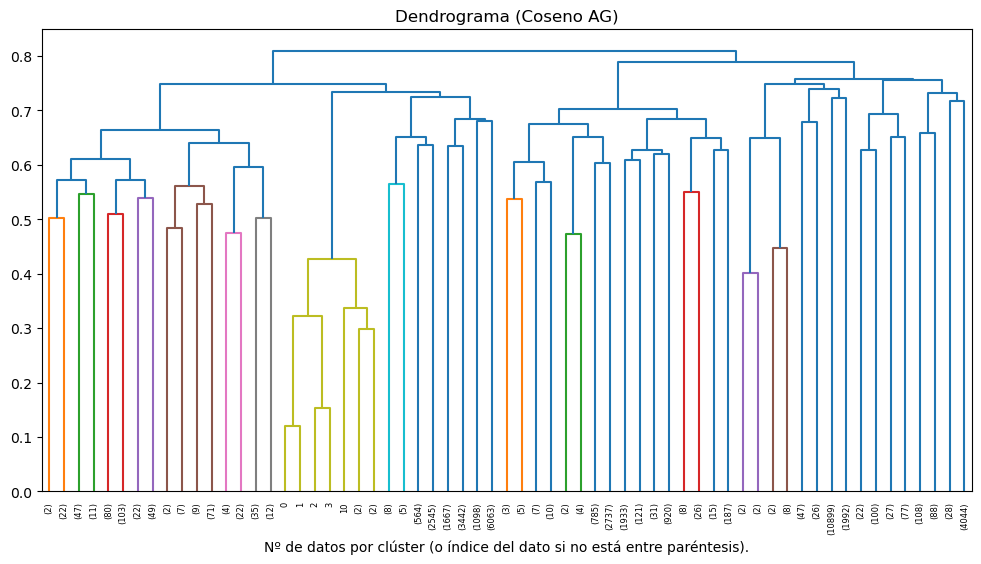

In [167]:
AG_cosine = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='cosine', linkage='average')
AG_cosine.fit(df)

# Graficamos el dendrograma para la distancia Coseno
plt.figure(figsize=(12, 6))
plt.title("Dendrograma (Coseno AG)")
plot_dendrogram(AG_cosine, truncate_mode="level", p=5)
plt.xlabel("Nº de datos por clúster (o índice del dato si no está entre paréntesis).")
plt.show()


Con la distancia coseno, vemos que la división de datos entre los distintos clústers se realiza peor que con la euclídea, puesto que unos pocos clústers son los que tienen una gran cantidad de datos, y el resto tienen muy pocos, o incluso se forman clústers compuestos por un solo dato.   
En este caso, variando la profundidad del dendograma vemos que la distribución no es uniforme, vemos el ejemplo aquí con la ramificación color mostaza, que resalta a la vista en comparación con el resto de ramificaciones.

Ahora con distancia manhattan (city block), y linkage = average.

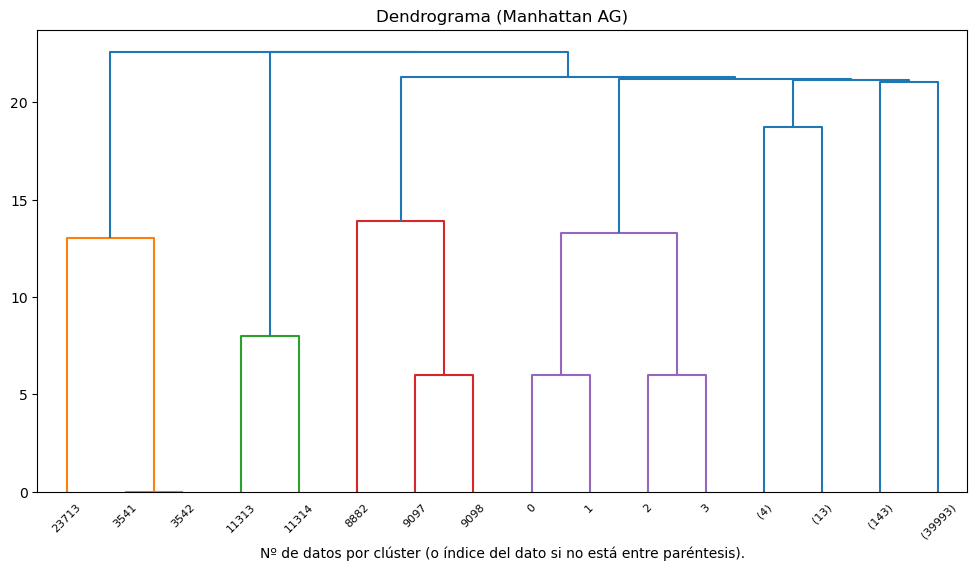

In [170]:
AG_manhattan = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='manhattan', linkage='average')
AG_manhattan.fit(df)

# Graficamos el dendrograma para la distancia Manhattan
plt.figure(figsize=(12, 6))
plt.title("Dendrograma (Manhattan AG)")
plot_dendrogram(AG_manhattan, truncate_mode="level", p=5)
plt.xlabel("Nº de datos por clúster (o índice del dato si no está entre paréntesis).")
plt.xticks(rotation=45, fontsize=8)
plt.show()

Con la distancia Manhattan vemos que funciona horriblemente, tenemos prácticamente todos los datos en un clúster, y el resto tienen o muy pocos datos, o son directamente un punto por clúster.  
Probando con distintas profundidades, vemos que las distribuciones de los datos en los clústers claramente no son nada uniformes, pues, como hemos dicho, casi todos los puntos se concentran en solo una agrupación. Como podemos ver en el siguiente gráfico, aumentando la profundidad permanece esta tendencia:

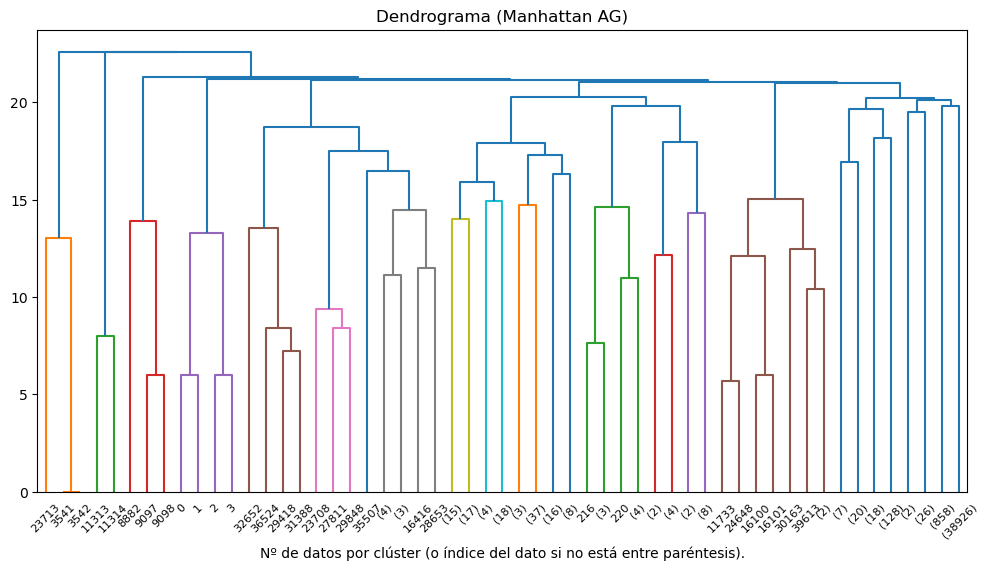

In [172]:
plt.figure(figsize=(12, 6))
plt.title("Dendrograma (Manhattan AG)")
plot_dendrogram(AG_manhattan, truncate_mode="level", p=9)
plt.xlabel("Nº de datos por clúster (o índice del dato si no está entre paréntesis).")
plt.xticks(rotation=45, fontsize=8)
plt.show()

### BIRCH
Cremos una función para que nos muestre el dendograma del clustering BIRCH según los datos pasados, el tipo de distancia utilizada, el método de linkage y la profundidad del dendograma (5 por defecto).  
Utilizaremos un branching_factor = 50 (número máximo de nodos por hoja), n_clusters = None para generar el dendograma completo, threshold = 0.5 que define la distancia máxima para considerar un punto en un clúster.   
También nos va a devolver el modelo y las labels para más adelante calcular los Índices de calidad.

In [174]:
from sklearn.cluster import Birch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

def birch_dendogram(df, metric, linkage_method, p=5, plot=True):
    """ Realiza clustering BIRCH y genera un dendograma 
    """
    birch = Birch(branching_factor=50, n_clusters=None, threshold=0.5)
    birch.fit(df)
    labels = birch.labels_
    
    # Generamos la matriz de distancias para el dendrograma
    dist_matrix = pdist(df, metric=metric)
    linkage_matrix = linkage(dist_matrix, method=linkage_method)

    if plot:
        # Dendrograma
        plt.figure(figsize=(12, 6))
        dendrogram(linkage_matrix, truncate_mode="level", p=p)
        plt.title(f"Dendrograma (BIRCH - {metric} Distance)")
        plt.xlabel("Nº de datos por clúster (o índice del dato si no está entre paréntesis).")
        plt.show()
    return birch, labels

BIRCH con distancia euclidea y linkage = ward.

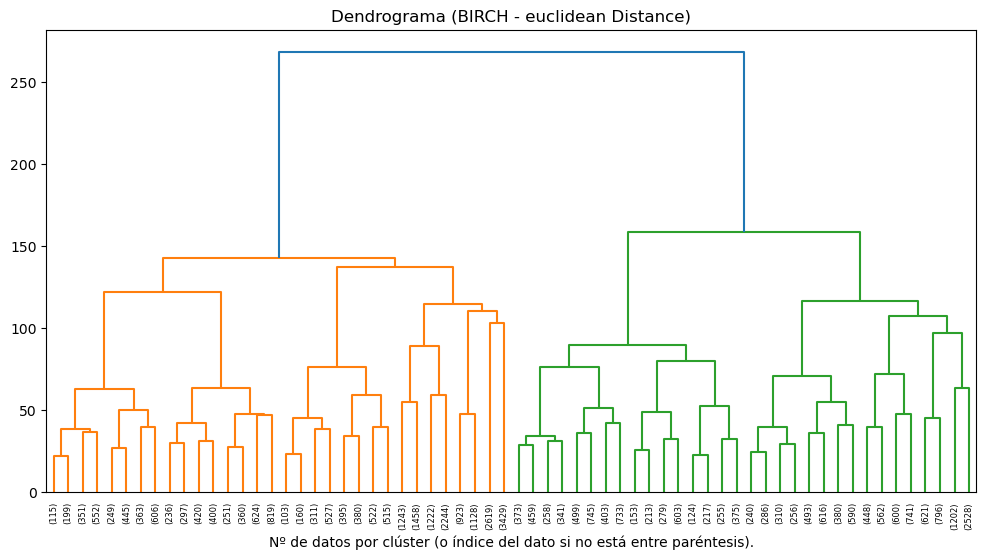

In [176]:
birch_euclidean, labels_birch_euclidean = birch_dendogram(df, "euclidean", "ward")

Con el método BIRCH vemos que tenemos prácticamente los mismos resultados que con AgglomerativeClustering empleando la distancia euclídea. Por lo que las conclusiones son las mismas.

Con distancia coseno (normalizamos el dataset con la norma l2):

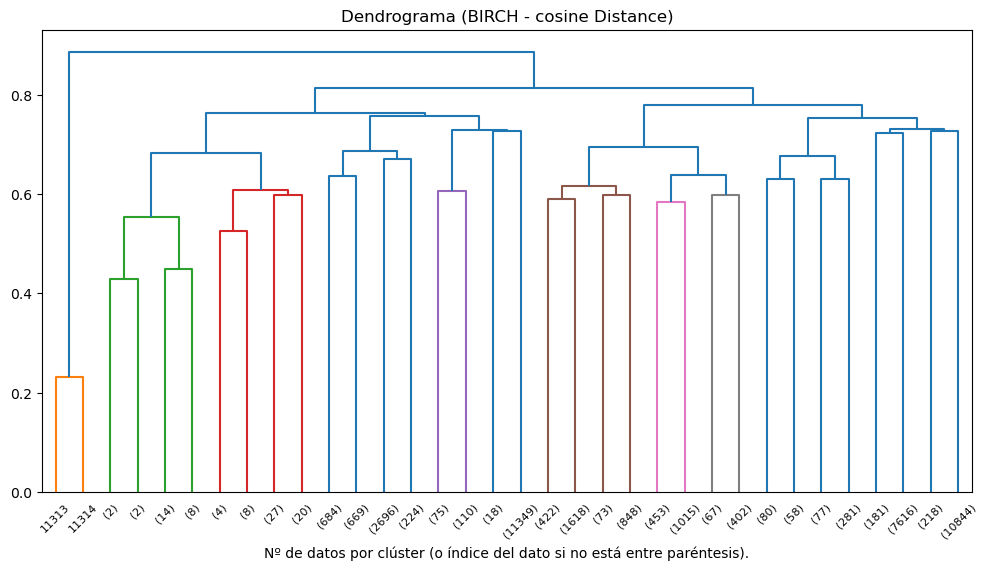

In [179]:
from sklearn.preprocessing import normalize

# Normalizamos el dataset para usar distancia coseno
df_cosine_normalized = normalize(df, norm='l2')

birch_cosine, labels_birch_cosine = birch_dendogram(df_cosine_normalized, "cosine", "average")

Con la distancia coseno, vemos diferencias con el del AgglomerativeClustering pero también similitudes. Ambas tienen clústers que condensan gran parte de los datos, y otros más pequeños, incluso alguno que solamente tiene un dato. Como diferencias, en el dendograma del BIRCH tenemos un número final de clústeres menor que en el del AgglomerativeClustering.  
Variando la profundidad del dendograma vemos que, como con la distancia coseno en el AgglomerativeClustering, la distribución entre los clústers no es uniforme, pues se crean clústers formados por un solo dato, otros muy pequeños y pocos más grandes:

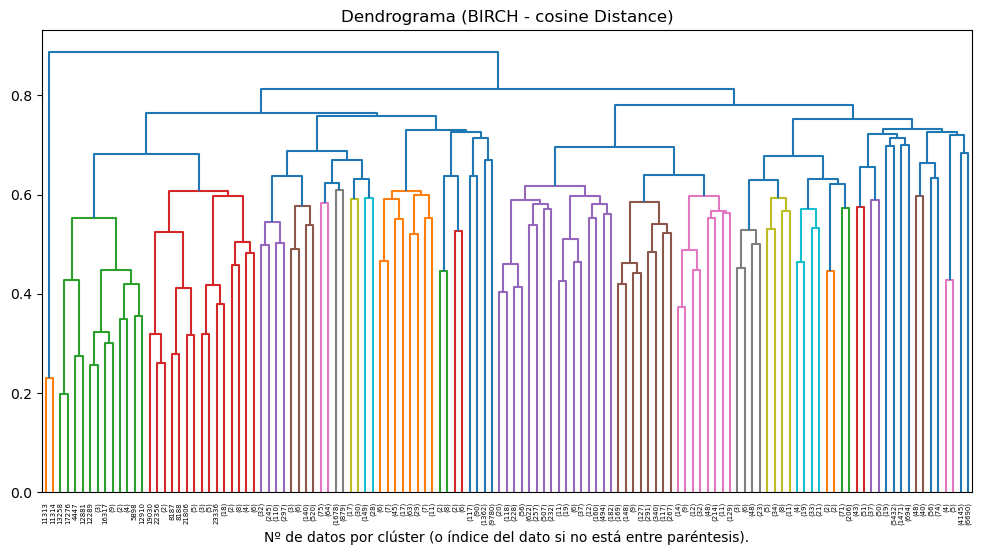

(Birch(n_clusters=None), array([   0,    0,    0, ..., 1211, 1211, 1211]))

In [128]:
birch_dendogram(df_cosine_normalized, "cosine", "average", p=7)

Por último, probamos con distancia cityblock (manhattan) y linkage = average

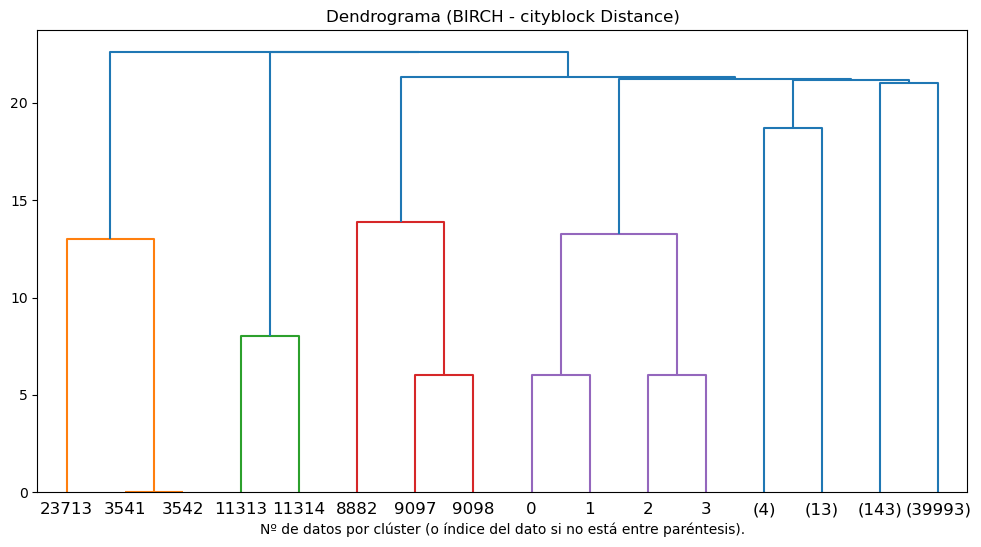

In [180]:
birch_manhattan, labels_birch_manhattan = birch_dendogram(df, "cityblock", "average")

Otra vez, tenemos los mismos resultados que con el AgglomerativeClustering con distancia Manhattan. Por lo que las conclusiones son las mismas.

## Tarea 2.3: ¿Cómo afectan las diferentes métricas de distancia a la estructura del dendrograma?

Vemos que la mejor distancia para nuestro clustering es la euclidea, ya que mantiene una distribución uniforme de los datos entre los distintos clústers. La coseno no funciona mal del todo, y la manhattan es pésima. Además, para la distancia coseno vemos que el dendograma,el eje está comprendido entre valores 0 y 1, lo cual ayuda más a la comparación con otros métodos. En cambio las distancias euclídea y manhattan utilizan una escala no acotada superiormente.

## Tarea 2.4 Utiliza por lo menos dos índices de calidad de clustering y y analiza sus resultados.

Vamos a evaluar con los índices de Calinski-Harabasz, Davies Bouldin y Silueta.  
### Agglomerative Clustering:
Creamos una función para encapsular el código. Con el Agglomerative Clustering no podemos visualizar los diagramas de Silueta por la naturaleza de este algoritmo, pero si que lo haremos para el BIRCH más adelante.

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from scipy.cluster.hierarchy import cut_tree

def compute_linkage_matrix(modelo, n_samples):
    """
    Devuelve una matriz de enlace a partir de un modelo AgglomerativeClustering.
    """
    counts = np.zeros(modelo.children_.shape[0])
    for i, merge in enumerate(modelo.children_):
        count_left = 1 if merge[0] < n_samples else counts[merge[0] - n_samples]
        count_right = 1 if merge[1] < n_samples else counts[merge[1] - n_samples]
        counts[i] = count_left + count_right
    linkage_matrix = np.column_stack([modelo.children_, modelo.distances_, counts]).astype(float)
    return linkage_matrix

def plot_AG_indices(df, modelo):
    """
    Calcula y plotea los índices de calidad de Calinski-Harabasz, Davies Bouldin y Silueta para diferentes números de clusters.
    """
    # Construimos la matriz de enlace
    linkage_matrix = compute_linkage_matrix(modelo, df.shape[0])

    # Rango de clusters
    n_clusters_range = range(2, 8)
    calinski_scores = []
    davies_scores = []
    silhouette_scores = []

    # Cortamos el dendrograma para distintos números de clusters
    for n_clusters in n_clusters_range:
        labels = cut_tree(linkage_matrix, n_clusters=n_clusters).flatten()

        # Calculamos índices
        calinski = calinski_harabasz_score(df, labels)
        davies = davies_bouldin_score(df, labels)
        silhouette = silhouette_score(df, labels)

        calinski_scores.append(calinski)
        davies_scores.append(davies)
        silhouette_scores.append(silhouette)

    # Graficamos los índices
    plt.figure(figsize=(18, 5))

    # Índice de Calinski-Harabasz
    plt.subplot(1, 3, 1)
    plt.plot(n_clusters_range, calinski_scores, marker='o', label='Calinski-Harabasz')
    plt.title('Índice de Calinski-Harabasz')
    plt.xlabel('Número de clusters')
    plt.ylabel('Puntaje')
    plt.grid(True)

    # Índice de Davies-Bouldin
    plt.subplot(1, 3, 2)
    plt.plot(n_clusters_range, davies_scores, marker='o', label='Davies-Bouldin', color='orange')
    plt.title('Índice de Davies-Bouldin')
    plt.xlabel('Número de clusters')
    plt.ylabel('Puntaje')
    plt.grid(True)

    # Índice de Silhouette
    plt.subplot(1, 3, 3)
    plt.plot(n_clusters_range, silhouette_scores, marker='o', label='Silhouette', color='green')
    plt.title('Índice de Silhouette')
    plt.xlabel('Número de clusters')
    plt.ylabel('Puntaje')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


Con distancias euclídeas:

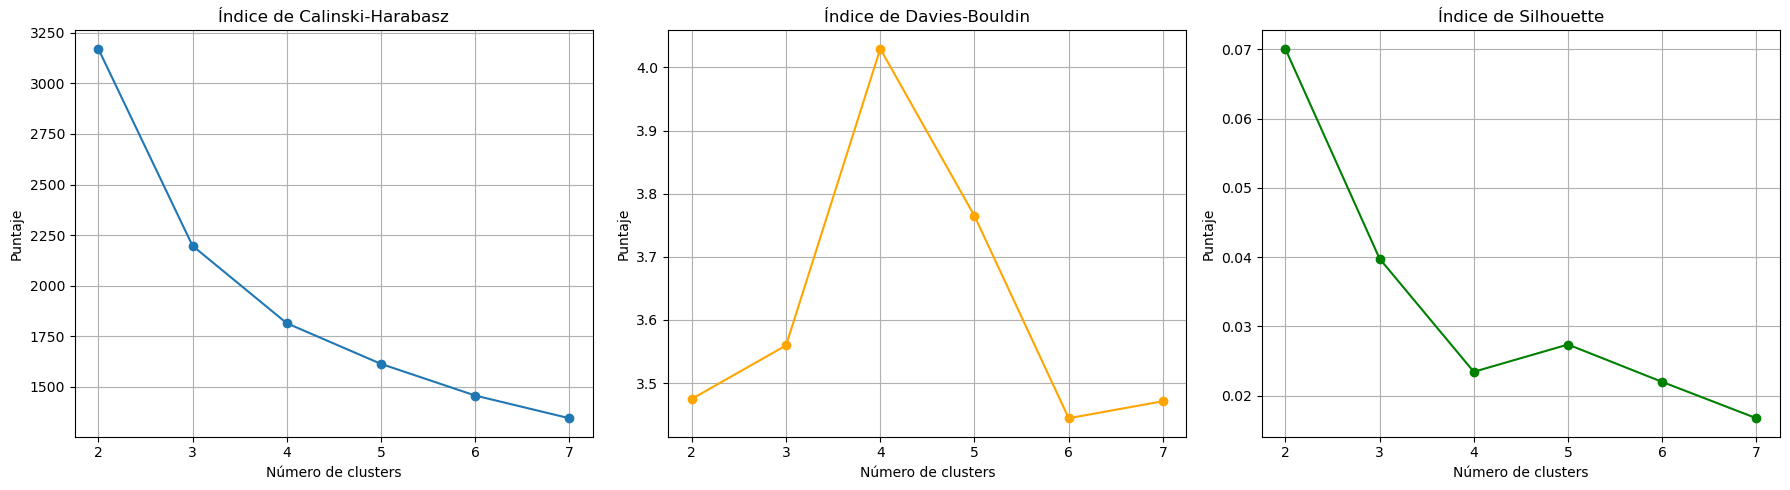

In [201]:
plot_AG_indices(df, AG_euclidean)

Para analizar los resultados tenemos que tener en cuenta que el Índice de Calinski-Harabasz da las puntuaciones mayores al mejor número de clusters, al igual que el Índice de Silueta, y al contrario que el de Davies Bouldin, que da puntuaciones más bajas a la mejor separación en números de clusters.   
Así, vemos que nuestro número óptimo de clusters con las 3 métricas es 2, aunque es cierto que con el Índice de Davies Bouldin, 6 clusters obtiene la menor puntuación por lo que sería el número óptimo. Tanto en la gráfica de Davies Bouldin como en la de Silueta vemos que 4 clústers sería un número muy malo para separación de los datos.

Con distancias coseno:

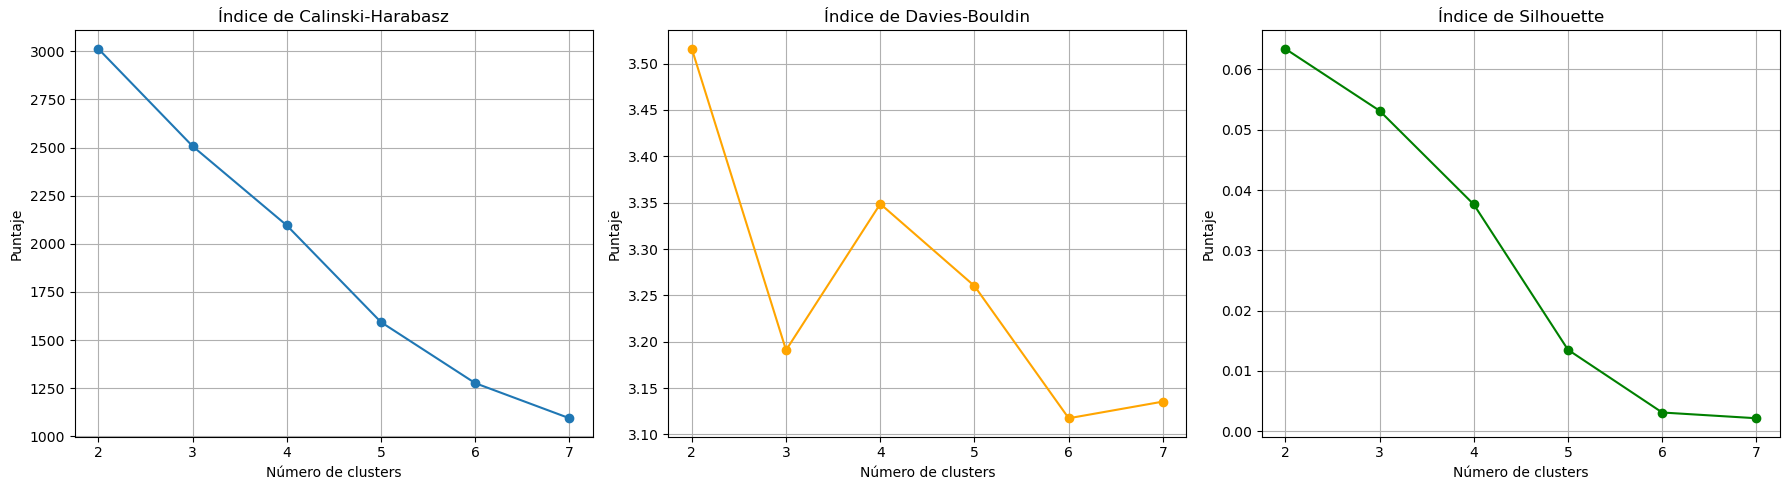

In [204]:
plot_AG_indices(df, AG_cosine)

Con las distancias coseno vemos que el Índice de Calinski-Harabasz no varía casi en comparación con la anterior distancia euclídea, al igual que el Índice de Silueta, con la leve diferencia de que esta vez la bajada de la puntuación a medida que aumentamos el número de clústers es más suave, no tan pronunciada como antes.    
El Índice de Davies Bouldin si que vemos que cambia bastante, sigue apareciendo 6 como el número óptimo de clústers pero esta vez seguido de 7, y obteniendo 2 clusters como el peor número de agrupaciones al tener la puntuación más alta.

Con distancias manhattan:

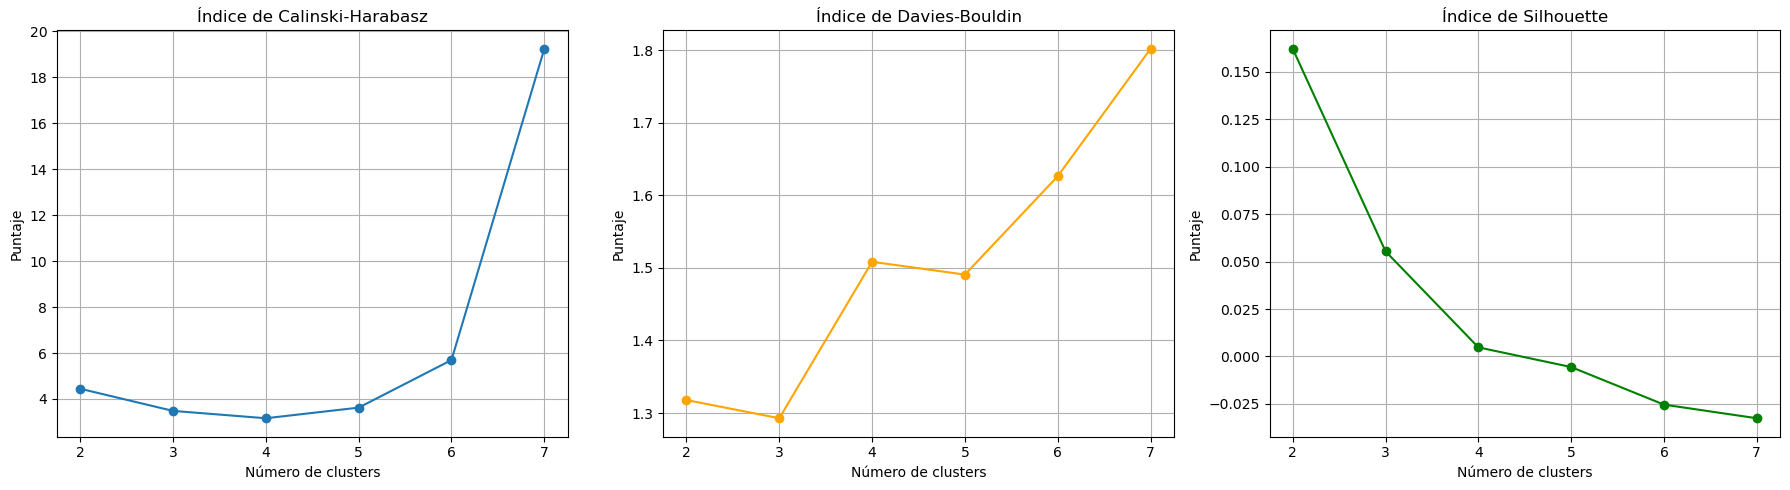

In [138]:
plot_AG_indices(df, AG_manhattan)

Encontramos un Índice de Silueta muy similar al anterior, indicando 2 clústers como lo óptimo.   
El Índice de Davies Bouldin tiene una tendencia creciente de puntuación a medida que aumentamos el número de clústers, obteniendo 3 clústers como el número óptimo, y después 2.   
Por último, vemos que el índice de Calinski-Harabasz cambia por completo esta vez, indicando que 7 clústers es la mejor división de los datos, y que el resto de divisiones son muy malas.   
Recordemos que, cuando analizamos los dendogramas anteriormente, la distancia manhattan daba resultados muy malos en cuanto a la división de datos en los distintos clústers, por lo que no nos fiaremos mucho de estos Índices de calidad.

### BIRCH:
Primero visualizamos los índices Calinski-Harabasz y Davies Bouldin, y después visualizamos los diagramas de Silueta, compatibles con BIRCH.  
Encapsulamos el código en funciones al igual que antes.

In [181]:
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import Birch

def plot_birch_indices(df, labels):
    """
    Calcula y plotea los índices de Calinski-Harabasz y Davies-Bouldin para un rango de clusters de 2 a 8, usando las etiquetas 
    proporcionadas de modelos entrenados BIRCH.
    """
    # Rango de clusters
    n_clusters_range = range(2, 9)
    calinski_scores = []
    davies_scores = []

    # Calculamos índices para diferentes números de clusters
    for n_clusters in n_clusters_range:
        # Recortamos las etiquetas a n_clusters
        labels_cut = labels.copy()  
        labels_cut[labels_cut >= n_clusters] = -1  # Asignamos -1 a los clusters que no existan

        # Calculamos los índices
        calinski = calinski_harabasz_score(df, labels_cut)
        davies = davies_bouldin_score(df, labels_cut)

        calinski_scores.append(calinski)
        davies_scores.append(davies)

    # Creamos subplots para graficar
    fig, axes = plt.subplots(1, 2, figsize=(11, 4))

    # Índice de Calinski-Harabasz
    axes[0].plot(n_clusters_range, calinski_scores, marker='o', label='Calinski-Harabasz', color='blue')
    axes[0].set_title('Índice de Calinski-Harabasz')
    axes[0].set_xlabel('Número de clusters')
    axes[0].set_ylabel('Puntaje')
    axes[0].grid(True, linestyle='--', alpha=0.7)
    axes[0].legend()

    # Índice de Davies-Bouldin
    axes[1].plot(n_clusters_range, davies_scores, marker='o', label='Davies-Bouldin', color='orange')
    axes[1].set_title('Índice de Davies-Bouldin')
    axes[1].set_xlabel('Número de clusters')
    axes[1].set_ylabel('Puntaje')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

Con distancias euclídeas:

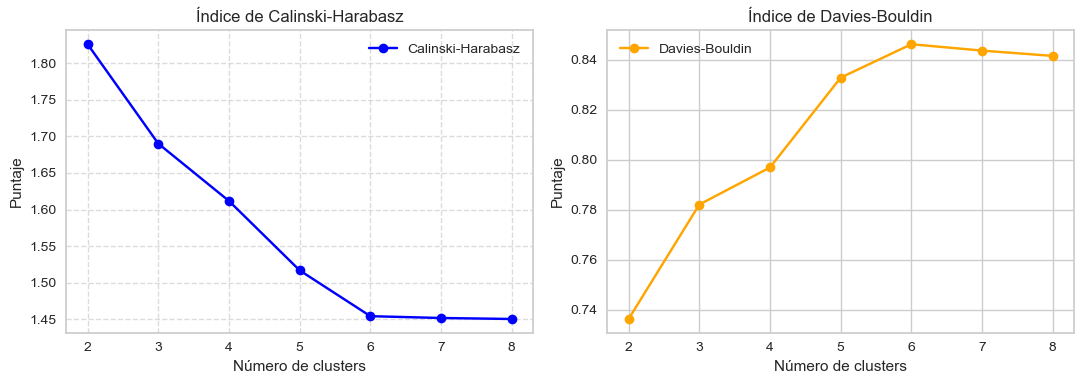

In [184]:
plot_birch_indices(df, labels_birch_euclidean)

Tanto el índice de Calinski-Harabasz como el de Davies Bouldin muestran tendencias similares, es verdad que no se leen igual las dos gráficas porque son métricas inversamente proporcionales. Justamente por eso tiene sentido que el valor más alto del primero sea para 2 clústers al igual que el más bajo para el segundo índice, indicando el número óptimo de estos. A medida que aumentan el número de clústers, los índices empeoran, indicando que cuantas más divisiones de los datos, peores son estas.

Con distancias coseno:

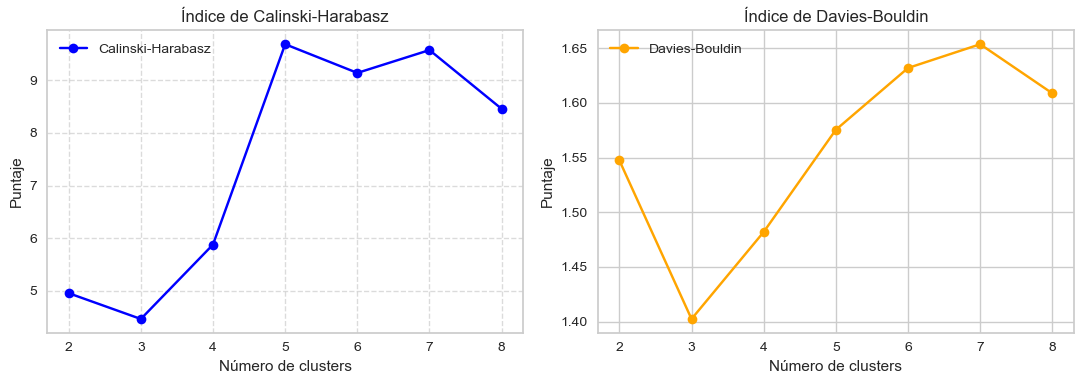

In [186]:
plot_birch_indices(df, labels_birch_cosine)

Para las distancias coseno, vemos que el Índice de Davies Bouldin mantiene su tendencia parecida a la de la distancia euclídea pero esta vez el número óptimo de clústers es 3 y después 4.  
Esta vez se contradice totalmente con el Índice de Calinski-Harabasz ya que este muestra que 3 clústers es la peor división, seguida de 2, y que la mejor serían 5 clústers.

Con distancias manhattan:

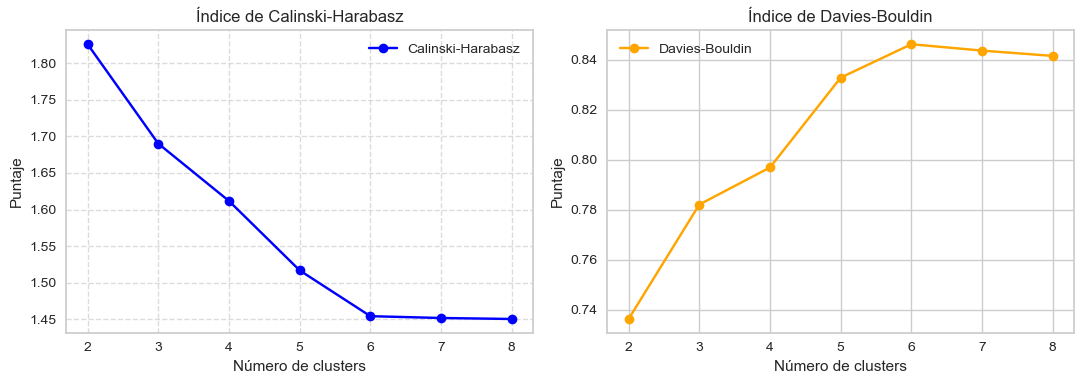

In [188]:
plot_birch_indices(df, labels_birch_manhattan)

Sorprendentemente, para la distancia manhattan (que era la peor) obtenemos prácticamente los mismos índices que con la euclídea.

Diagramas de Silueta para BIRCH, lo hacemos desde 2 a 5 clústers puesto que es muy costoso:

In [208]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
from sklearn.cluster import Birch

def plot_silhouette_birch(df, model):
    """
    Genera la visualización del índice de silueta para un rango de clusters de 2 a 5 usando el modelo Birch.
    """
    n_clusters_range = range(2, 6)  # Rango de 2 a 5 clusters

    # Creamos subplots para graficar
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))  # 4 subgráficos

    # Creamos visualización de silueta para cada número de clusters
    for i, n_clusters in enumerate(n_clusters_range):
        # Entrenamos Birch para el número de clusters deseado
        model.set_params(n_clusters=n_clusters)
        model.fit(df)

        # Creamos el visualizador de silueta para cada número de clusters
        visualizer = SilhouetteVisualizer(model, ax=axes[i], colors='yellowbrick')

        visualizer.fit(df)             # Ajustamos el visualizador a los datos

        axes[i].set_title(f'Clusters = {n_clusters}')

    plt.tight_layout()
    plt.show()

Visualizamos el Índice de Silueta únicamente para la distancia euclídea ya que es muy costoso hacerlo y esta es la que mejor separa los datos.

C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but Birch was fitted with feature names
  warnings.warn(
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but Birch was fitted with feature names
  warnings.warn(
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but Birch was fitted with feature names
  warnings.warn(
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but Birch was fitted with feature names
  warnings.warn(


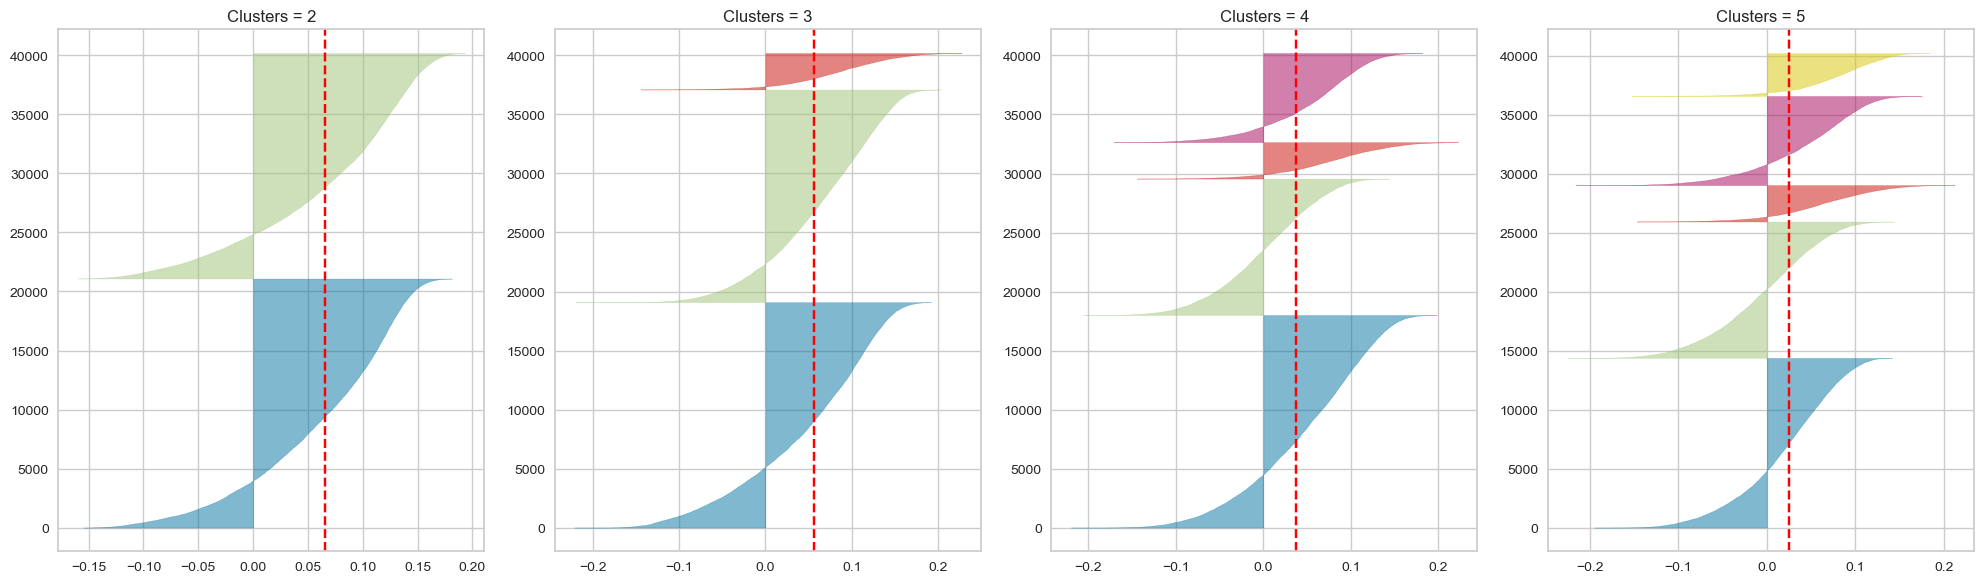

In [212]:
plot_silhouette_birch(df, birch_euclidean)

Observamos que en todas las posibles divisiones encontramos datos mal clasificados, aunque sean muy pocos como vemos con el clúster que aparece de color rojo, o el amarillo.   
Se ve que tenemos 2 clústers mayoritarios que son el gris y el azul, que, hasta con 5 clústers condensan más de la mitad de los datos. Estos dos clústers son los que más número de datos mal clasificados tienen, lo que tiene sentido al ser los más grandes.  
El mejor Índice de Silueta se lo lleva la división en 2 clústers, muy poco por delante de la de 3 clústers. La peor separación sería en 5 clústers.

## Tarea 2.5 ¿Cuál es el número óptimo de clusters? ¿por qué?.

Habiendo analizado todos los Índices de calidad con los distintos modelos y distancias, lo más seguro sería decir que el número óptimo de clústers es 2.   
Teniendo en cuenta principalmente los modelos con distancia euclídeas y coseno (vimos antes que eran las que mejor dividían los datos en los clústers), el valor más repetido de número óptimo de clústers es 2, aunque es cierto que este número difiere en ocasiones, principalmente empleando la distancia coseno y evaluando con Davies Bouldin.   
En verdad, tampoco tenemos otro candidato tan claro como este al número óptimo de clústers.

## Tarea 2.6: Queremos conocer, con ayuda de métodos de clustering, las zonas con mayor índice de siniestralidad para cada tipo de vehículo. Ayúdate de diferentes modelos para hacer un análisis detallado de esta relación.

Para ello vamos a crear 2 funciones que muestren las zonas con mayores accidentes por cada tipo de vehículo, una con agglomerative clustering y otra con BIRCH.   
Vamos a utilizar el dataset preprocesado, y también el que no tiene las columnas categóricas pasadas a one-hot-encoding, ya que necesitamos los distritos y tipos de vehículos.    
Vamos a emplear 5 clusters ya que este es el número que detecta BIRCH y hacer sólo 2 clústers no nos serviría mucho para esta tarea.

In [633]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering, Birch
import matplotlib.pyplot as plt

def agglomerative_clustering_analysis(df, df_raw):
    """
    Realiza análisis de clustering jerárquico (Agglomerative) sobre el tipo de vehículo y distrito, visualiza resultados.
    """

    # Analizamos los resultados con 5 clusters
    n_clusters = 5
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = model.fit_predict(df)

    df_raw['cluster_agglomerative'] = labels

    # Agrupamos por clusters, tipo_vehiculo y distrito
    cluster_analysis = df_raw.groupby(['cluster_agglomerative', 'tipo_vehiculo', 'distrito']).size()
    
    # Filtramos solo los que tienen un tamaño mayor a 100 para hacer el análisis de los accidentes mayoritarios
    cluster_analysis_filtered = cluster_analysis[cluster_analysis > 50]
    
    # Ordenamos dentro de cada tipo_vehiculo por tamaño en la columna distrito
    cluster_analysis_filtered = (
        cluster_analysis_filtered
        .groupby(['cluster_agglomerative', 'tipo_vehiculo'], group_keys=False)
        .apply(lambda x: x.sort_values(ascending=False))
    )

    # Graficamos los resultados por cluster, distrito y tipo de vehículo
    n_clusters = len(cluster_analysis_filtered.index.levels[0])
    fig, axes = plt.subplots(n_clusters, figsize=(13, 5 * n_clusters), sharex=False)

    if n_clusters == 1:  # Si solo hay un cluster, axes será un solo subplot, así que lo convertimos a lista.
        axes = [axes]

    for cluster, ax in zip(cluster_analysis_filtered.index.levels[0], axes):
        cluster_data = cluster_analysis_filtered.loc[cluster]
        
        # tipo_vehiculo en el eje X y los distritos por colores en leyenda
        cluster_data_unstacked = cluster_data.unstack(level='distrito').fillna(0)
        
        # Gráfico de barras apiladas
        cluster_data_unstacked.plot(kind='bar',stacked=True,ax=ax,colormap='tab20',width=0.2)

        ax.set_title(f"Cluster {cluster}")
        ax.set_ylabel("Tamaño")
        ax.set_xlabel("Tipo de Vehículo")
        ax.legend(title="Distrito", loc="upper left", bbox_to_anchor=(1, 1))
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

    # Dropeamos la columna de clusters para no alterar el df_raw
    df_raw.drop(['cluster_agglomerative'], axis="columns", inplace=True)

    return cluster_analysis_filtered
    

def birch_clustering_analysis(df, df_raw, model):
    """
    Realiza análisis de clustering con Birch sobre el tipo de vehículo y distrito, visualiza resultados.
    """
    
    # Etiquetas del modelo
    labels = model.labels_
    n_clusters = len(np.unique(labels))
    print(f"Birch identificó {n_clusters} clusters.")

    df_raw['cluster_birch'] = labels

    # Agrupamos por clusters, tipo de vehículo y distrito
    cluster_analysis = df_raw.groupby(['cluster_birch', 'tipo_vehiculo', 'distrito']).size()

    # Filtramos solo los que tienen un tamaño mayor a 50
    cluster_analysis_filtered = cluster_analysis[cluster_analysis > 50]

    # Ordenamos dentro de cada tipo_vehiculo por tamaño en la columna distrito
    cluster_analysis_filtered = (
        cluster_analysis_filtered
        .groupby(['cluster_birch', 'tipo_vehiculo'], group_keys=False)
        .apply(lambda x: x.sort_values(ascending=False))
    )

    # Graficamos los resultados por cluster, distrito y tipo de vehículo
    n_clusters = len(cluster_analysis_filtered.index.levels[0])
    fig, axes = plt.subplots(n_clusters, figsize=(13, 5 * n_clusters), sharex=False)

    if n_clusters == 1:  # Si solo hay un cluster, axes será un solo subplot, así que lo convertimos a lista.
        axes = [axes]

    for cluster, ax in zip(cluster_analysis_filtered.index.levels[0], axes):
        cluster_data = cluster_analysis_filtered.loc[cluster]
        
        # tipo_vehiculo en el eje X y los distritos por colores en leyenda
        cluster_data_unstacked = cluster_data.unstack(level='distrito').fillna(0)
        
        # Gráfico de barras apiladas
        cluster_data_unstacked.plot(kind='bar',stacked=True,ax=ax,colormap='tab20',width=0.2)

        ax.set_title(f"Cluster {cluster}")
        ax.set_ylabel("Tamaño")
        ax.set_xlabel("Tipo de Vehículo")
        ax.legend(title="Distrito", loc="upper left", bbox_to_anchor=(1, 1))
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

    # Dropeamos la columna de clusters para no alterar el df_raw
    df_raw.drop(['cluster_birch'], axis="columns", inplace=True)

    return cluster_analysis_filtered


### Agglomerative Clustering con distancia euclídea

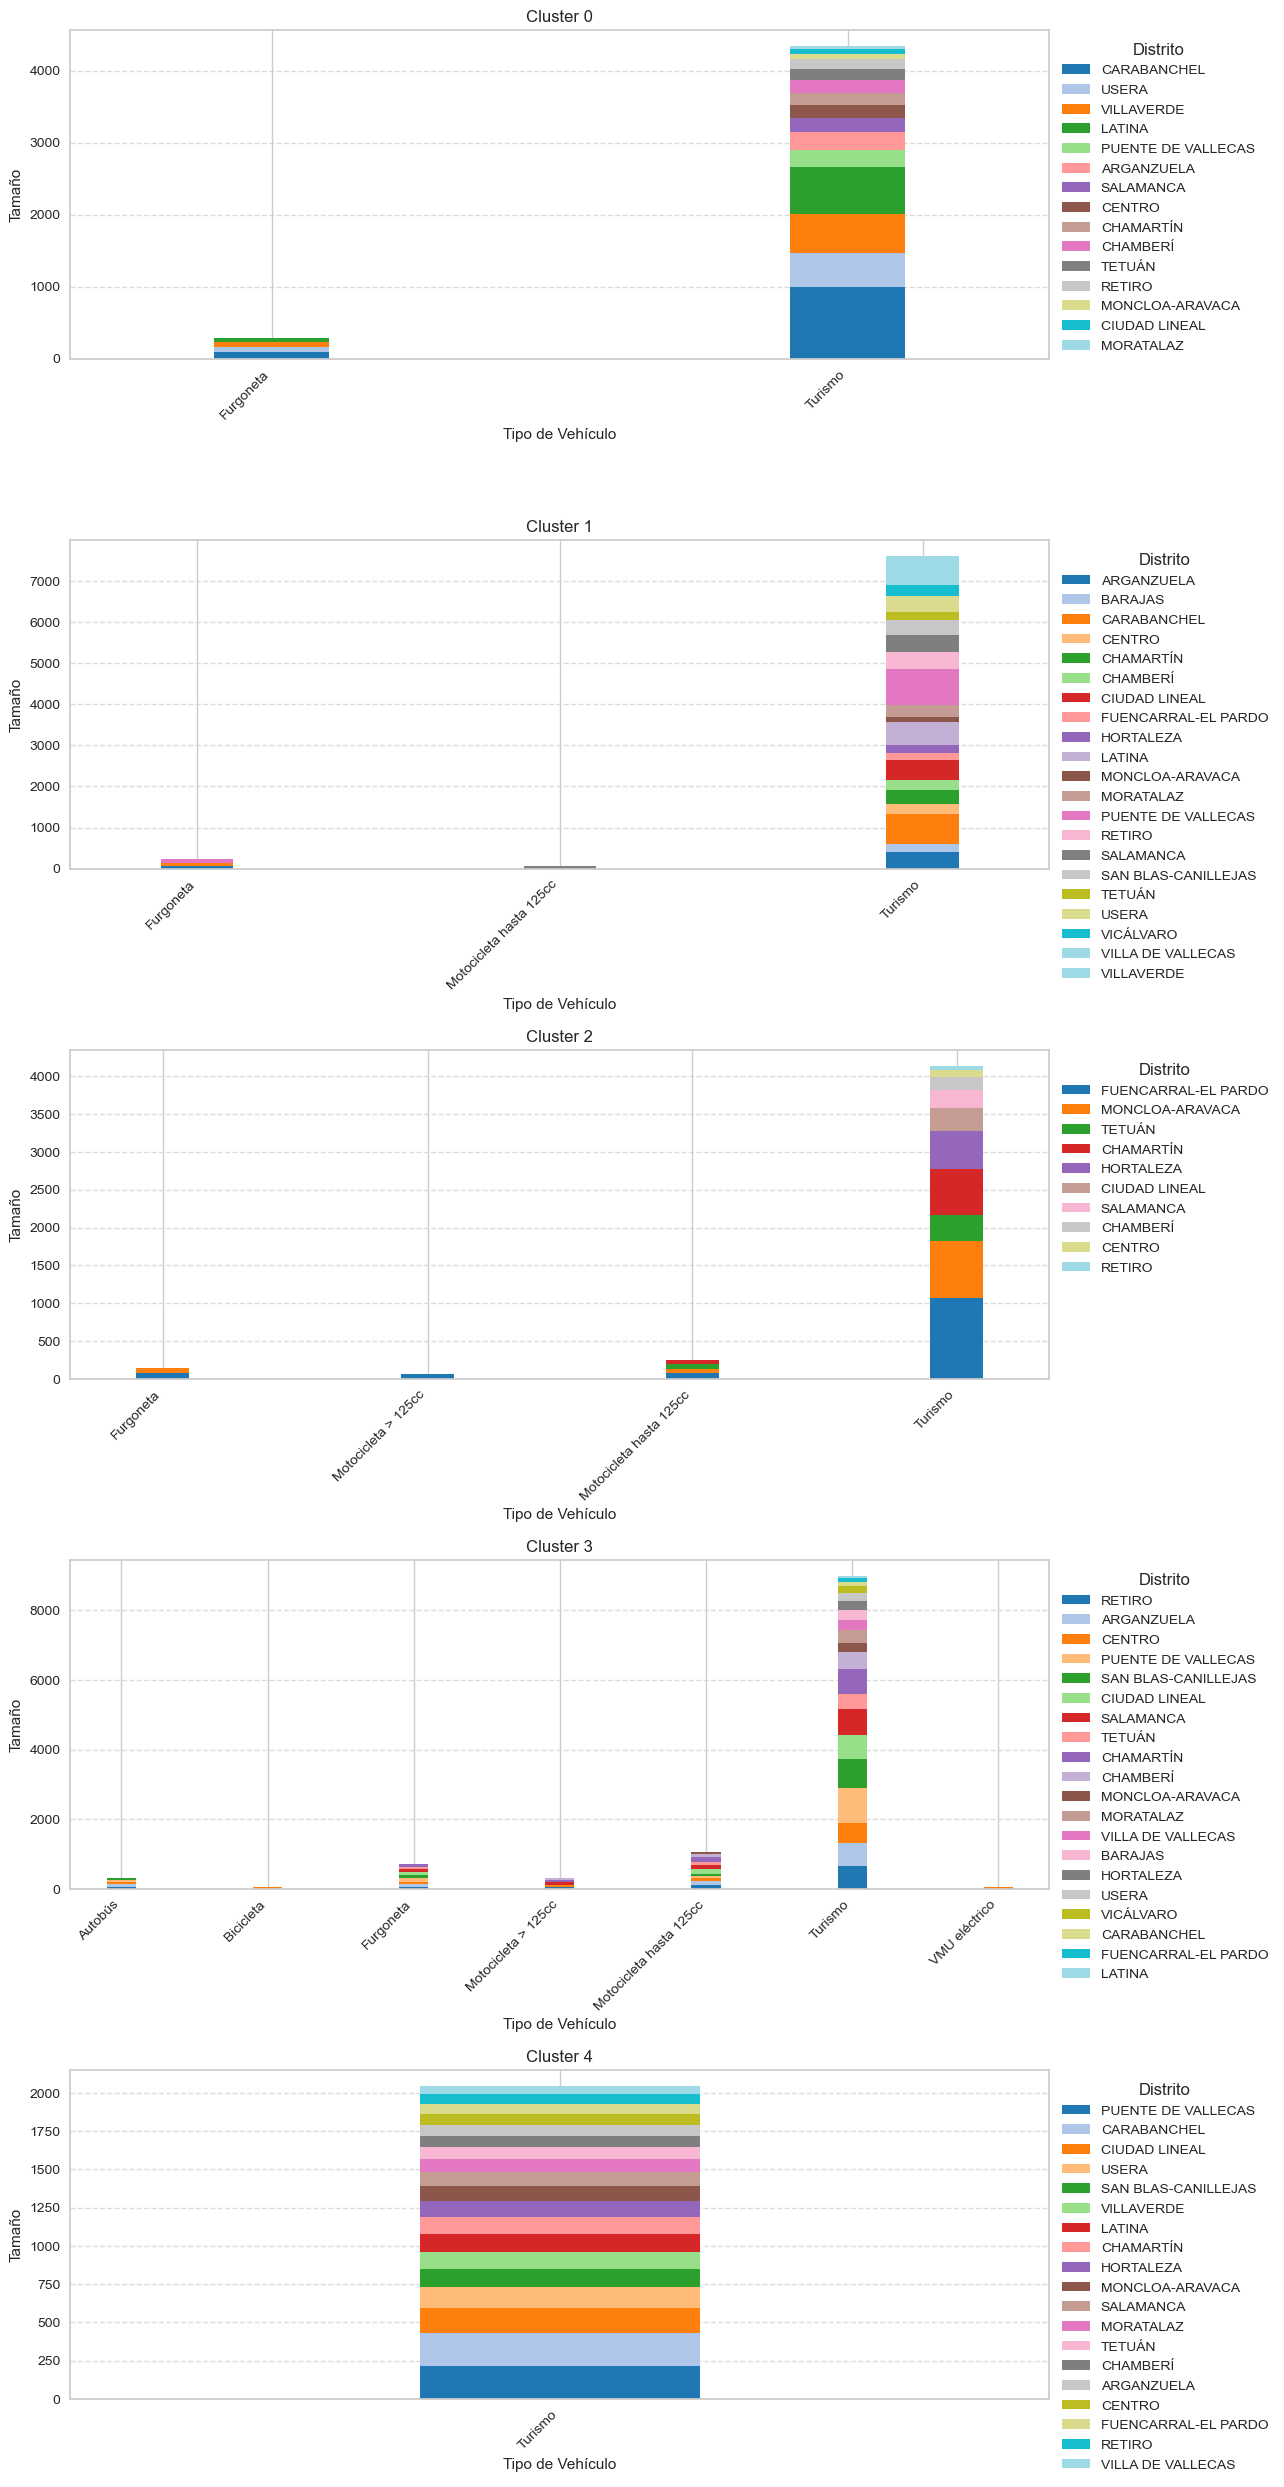

In [639]:
AG_analysis = agglomerative_clustering_analysis(df, df_raw)

Vemos que la división en distintos clústers es principalmente por el tipo de vehículo, ya que dependiendo del clúster, podemos ver alguno con solo un tipo, como el clúster 4 o con hasta 7 tipos distintos como en el clúster 3, aunque por supuesto hay tipos de vehículo que se repiten en todos los clústers. El turismo está en todos ya que es el principal vehículo con el que se producen accidentes.  
Vamos a analizar los resultados en la separación con BIRCH.

### BIRCH con distancia coseno

Birch identificó 5 clusters.


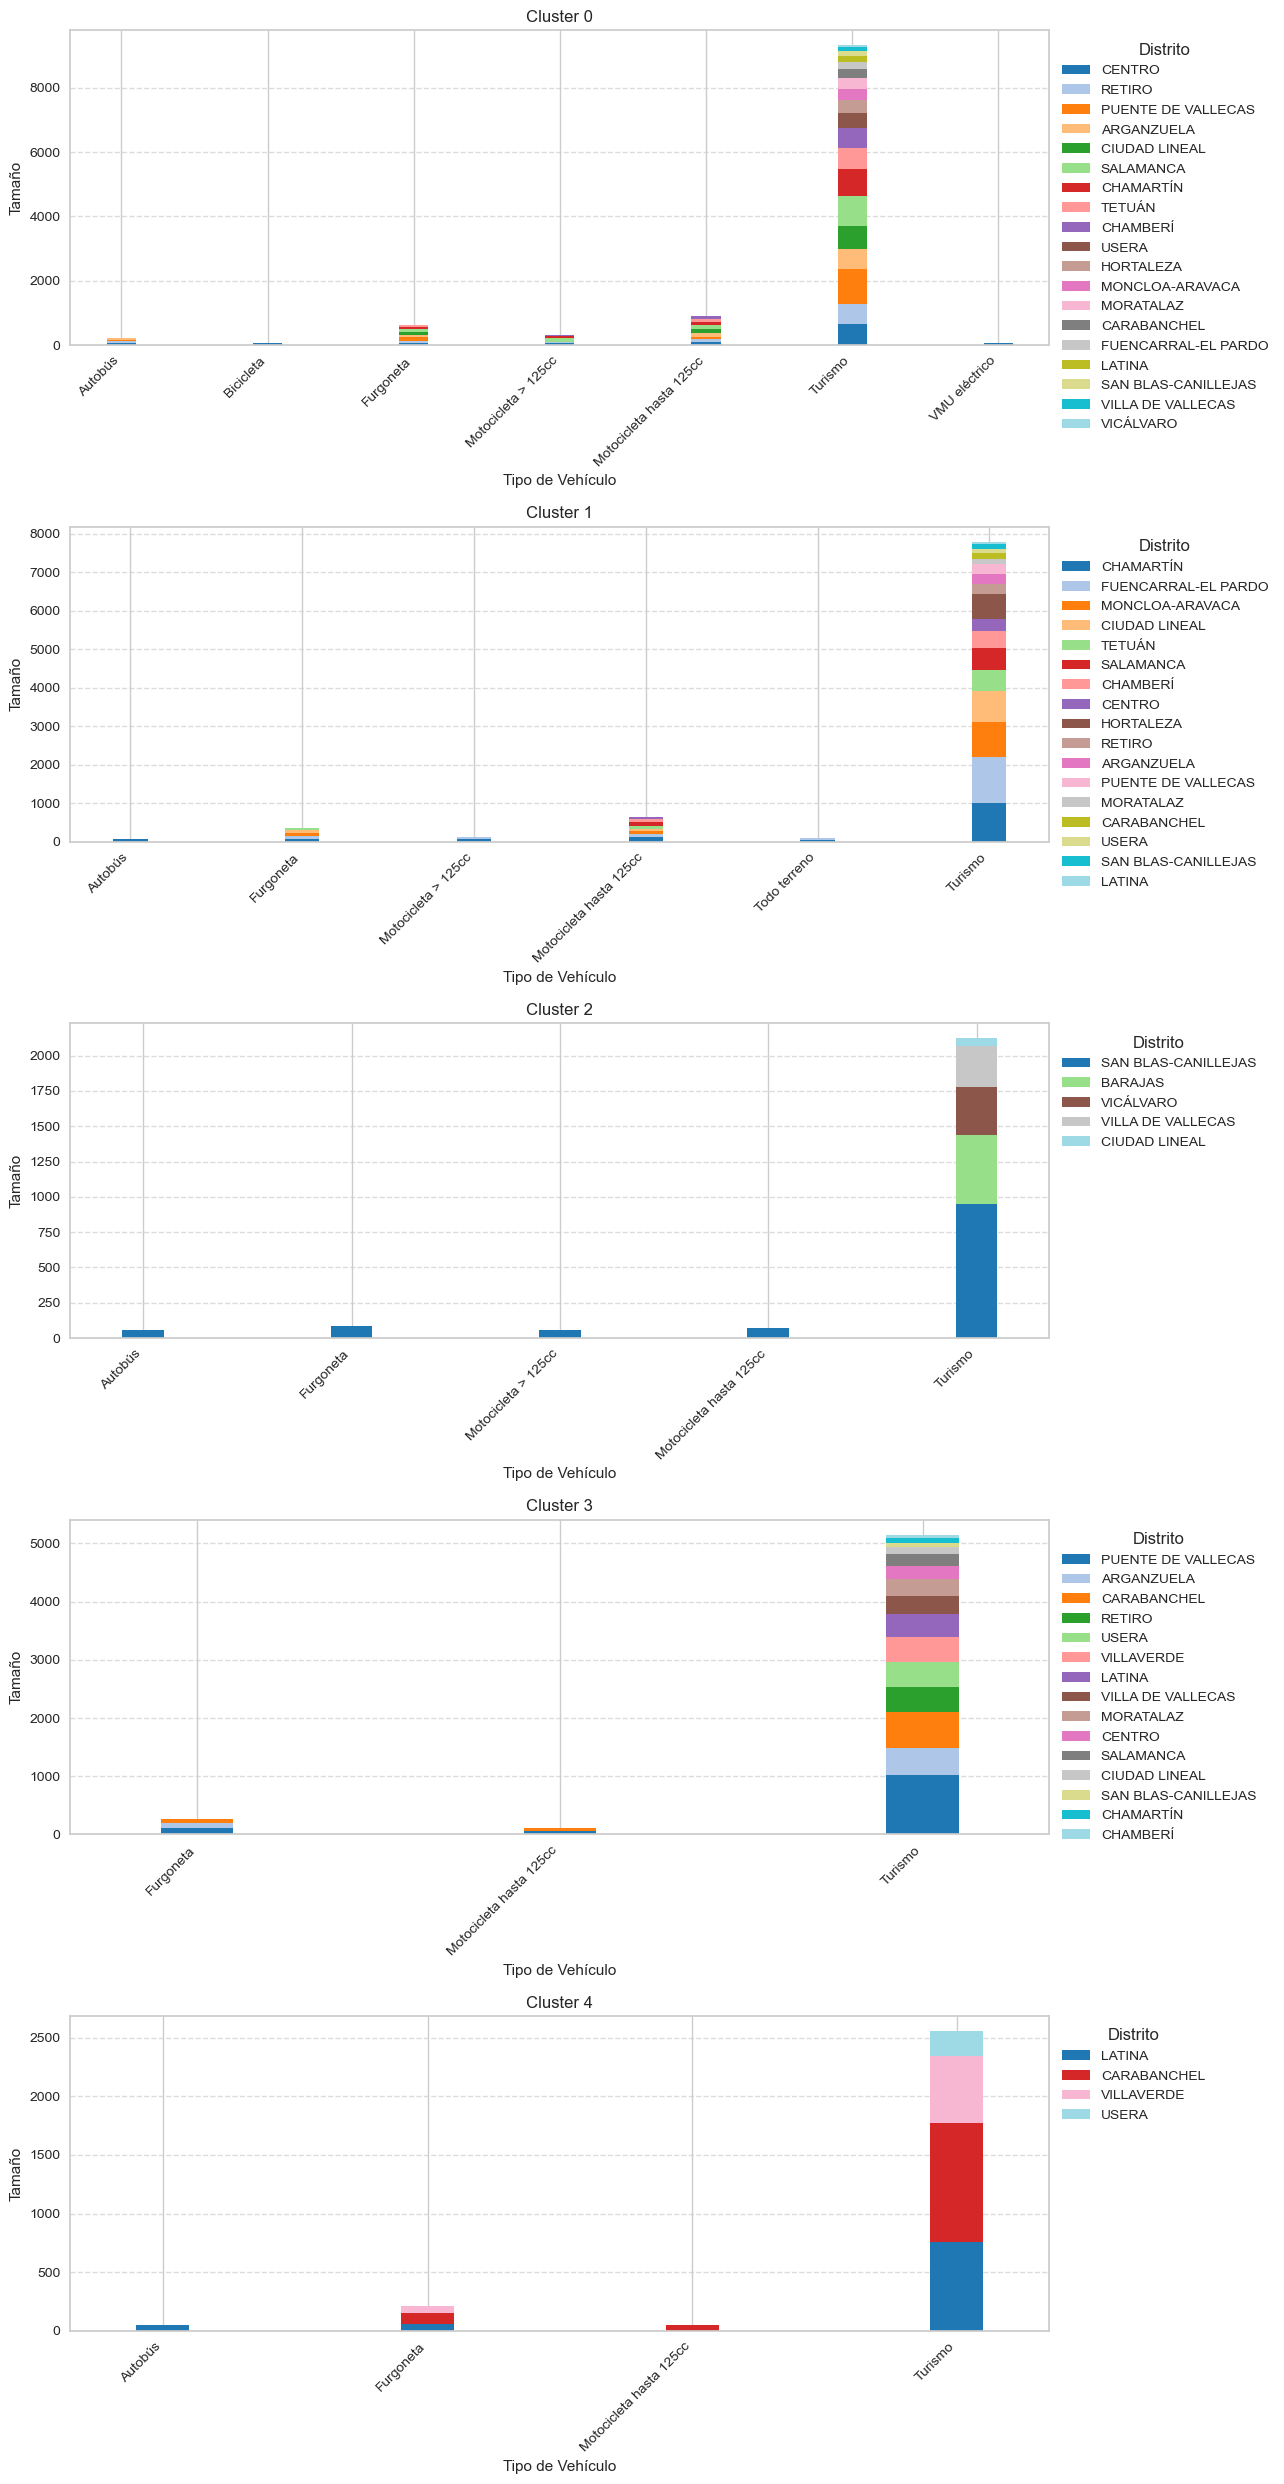

In [642]:
birch_analysis = birch_clustering_analysis(df, df_raw, birch_cosine)

BIRCH hace una mejor separación en clústers por distritos, por ejemplo en el clúster 4 vemos datos únicamente de los distritos de Latina, Carbanchel, Villaverde o Usera, los cuales son barrios colindantes. Esto sucede también en el clúster 2, que contiene distritos del este de Madrid.  
El turismo al ser el vehículo más utilizado también es el que más accidentes tiene, vemos aparece predominante en todos los clústers.  
La bicicleta, solamente aparece en accidentes del distrito centro, al igual que sucede con el VMU eléctrico, pues son vehículos que se utilizan mucho por alquiler en esa zona y no están disponibles en las afueras de la ciudad.
Los accidentes de furgoneta vemos que nunca suceden en el distrito Centro ni en los cercanos a él debido a que las furgonetas no circulan por esas zonas, sino principalmente por el extrarradio y zonas más industriales, como tiene sentido, ya que se utilizan para movimiento de mercancías.  
Los accidentes de todo terreno aparecen por Fuencarral-El Pardo debido a que es una zona de campo y es más transitada por vehículos equipados para ese tipo de terreno, estos no aparecen por el centro.  
Los de autobús los vemos en distritos como Latina, San Blas-Canillejas o Puente de Vallecas, distritos por los que pasan muchas líneas de autobuses.  
Finalmente, las motocicletas aparecen en distritos de todo tipo como Chamartín, Retiro, Carabanchel, Moncloa-Aravaca... ya que son vehículos muy utilizados en la ciudad por su tamaño y sencillez de conducción. Además, son probablemente los más propensos a tener accidentes en los que haya heridos, principalmente el conductor, debido a la exposición de este.